In [1]:

from datetime import datetime

from numpy import expand_dims
from numpy.random import randint
from tensorflow.keras.datasets.fashion_mnist import load_data
import tensorflow as tf
import sys
sys.path.append("..")
from src.models.c_dcgan import GAN
from src.models.train_helpers import CGanTrainer
import matplotlib.pyplot as plt

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)


def load_real_samples():
    (train_X, train_y), (_, _) = load_data()
    x = expand_dims(train_X, axis=-1)
    x = x.astype('float32')
    x = (x - 127.5) / 127.5
    return [x, train_y]


def generate_real_samples(dataset, n_samples):
    images, labels = dataset
    ix = randint(0, images.shape[0], n_samples)
    images, labels = images[ix], labels[ix]
    return [images, labels]


# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, callbacks, n_epochs=100, n_batch=128):

    logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
    file_writer = tf.summary.create_file_writer(logdir + "/metrics")

    trainer = CGanTrainer(d_model, g_model, gan_model, batch_size=n_batch, n_classes=10, noise_dim=latent_dim)
    bat_per_epo = int(dataset[0].shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    callbacks.on_train_begin()
    for i in range(n_epochs):
        for j in range(bat_per_epo):
            [x_real, labels_real] = generate_real_samples(dataset, half_batch)
            real_loss, fake_loss, gan_loss = trainer.train_step(x_real, labels_real, i)
           
        with file_writer.as_default():
            tf.summary.scalar('loss', data=real_loss, step=i)
            tf.summary.scalar('fake loss', data=fake_loss, step=i)
            tf.summary.scalar('gan loss', data=gan_loss, step=i)
            plot_buf = trainer.create_fig(i)
            image = tf.image.decode_png(plot_buf.getvalue(), channels=1)
            image = tf.expand_dims(image, 0)
            tf.summary.image('plot', data=image, step=i)
        
        trainer.create_fig(i)

        print('EPOCH:', i)
    # callbacks.on_train_end('_')
    g_model.save('../models/cgan_generator_mnist.h5')

## Define hyperparameters

In [2]:
latent_dim = 100
gan = GAN((28, 28, 1))
d_model = gan.discriminator
g_model = gan.generator
gan_model = gan.combined
dataset = load_real_samples()

log_path = './logs'
callback = tf.keras.callbacks.TensorBoard(log_path)
callback.set_model(gan_model)

4423680/4422102 [==============================] - 0s 0us/step


0 0.6990367 0.6945301 0.69207907
0 0.6066179 0.69799197 0.6889309
0 0.532925 0.70641243 0.6805173
0 0.46504572 0.7251706 0.6649444
0 0.4137493 0.7574986 0.64453286
0 0.3646355 0.7965436 0.62107134
0 0.32262754 0.83295876 0.62500393
0 0.27212968 0.8101631 0.6919577
0 0.28299212 0.68645906 0.81966305
0 0.2687719 0.56238306 1.002994
0 0.31859422 0.47259593 1.1192337
0 0.32301235 0.48803174 1.0543358
0 0.30117795 0.56094944 0.897357
0 0.3004058 0.651945 0.7636727
0 0.2805423 0.7509812 0.681279
0 0.22961491 0.8531886 0.61045206
0 0.19738835 0.90345377 0.5895213
0 0.17688337 0.92984986 0.59955585
0 0.1329886 0.8900744 0.6662503
0 0.10210374 0.7447494 0.8288827
0 0.09205697 0.5699229 1.0474718
0 0.07954088 0.4800243 1.1287637
0 0.081823826 0.50595355 1.0209862
0 0.068638526 0.6269902 0.8249136
0 0.060293064 0.75908005 0.68633556
0 0.076579675 0.82065254 0.641945
0 0.069085784 0.82873094 0.64681077
0 0.06083118 0.79215264 0.6804632
0 0.058792643 0.75749516 0.73808557
0 0.078689046 0.68920815 0

0 0.6078052 0.5959598 0.8617631
0 0.62010396 0.5969739 0.91201115
0 0.5905405 0.5836818 0.88253355
0 0.59146583 0.5968721 0.8549033
0 0.62314636 0.6550618 0.80422443
0 0.52936864 0.66489583 0.7658797
0 0.61893857 0.7139189 0.72305983
0 0.55432534 0.78534484 0.6801617
0 0.6157015 0.817215 0.66873974
0 0.57944214 0.8067695 0.64438564
0 0.5929074 0.841197 0.63250077
0 0.63768756 0.82915413 0.6519886
0 0.5917653 0.8134971 0.67837894
0 0.6920881 0.7683309 0.701233
0 0.68641484 0.74488425 0.7617299
0 0.7130322 0.69031763 0.79589516
0 0.71140563 0.6407324 0.8468338
0 0.71312517 0.6034032 0.881101
0 0.70888674 0.57277775 0.91190654
0 0.7220055 0.54847014 0.92834854
0 0.6726834 0.54059577 0.9612558
0 0.6773734 0.5146423 0.9615047
0 0.6666316 0.52369547 0.9735749
0 0.6401931 0.5367125 0.97404
0 0.67501396 0.54440564 0.94945455
0 0.6161591 0.56938833 0.9320468
0 0.63257384 0.6139889 0.8718597
0 0.7046745 0.6748579 0.8130069
0 0.63991594 0.7023101 0.73040736
0 0.58334094 0.7535416 0.7132275
0 0.66

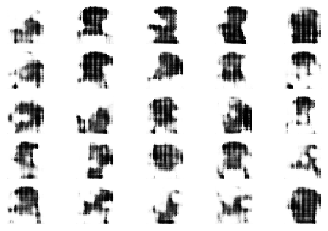

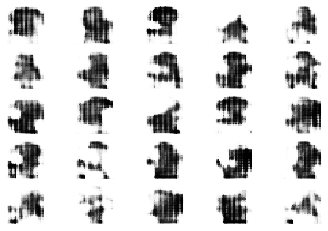

EPOCH: 0
1 0.6843 0.7138185 0.7565781
1 0.6947708 0.69701123 0.76316285
1 0.69686466 0.7289333 0.7695824
1 0.73235786 0.69534415 0.7751341
1 0.676497 0.70949167 0.76040655
1 0.6719916 0.697528 0.74474454
1 0.67023563 0.7141643 0.7112875
1 0.6770973 0.74605596 0.68682957
1 0.6713656 0.76785624 0.70658624
1 0.66038966 0.7306516 0.68648195
1 0.68854874 0.73419374 0.68469197
1 0.6712934 0.73244095 0.7137871
1 0.6473044 0.71380943 0.70440656
1 0.6751386 0.70961595 0.75424147
1 0.65775526 0.6828681 0.760317
1 0.6521522 0.6353066 0.77405965
1 0.6401323 0.6764216 0.774502
1 0.62906325 0.6497748 0.793417
1 0.6211141 0.6296075 0.8105589
1 0.59352535 0.635291 0.79469496
1 0.5822787 0.6186269 0.79142755
1 0.6026886 0.6478809 0.7932868
1 0.6081517 0.6789705 0.76987904
1 0.6062796 0.66545403 0.7666755
1 0.6040951 0.6844642 0.744169
1 0.5888046 0.69275457 0.71979564
1 0.58695906 0.6603059 0.749173
1 0.58791596 0.6993025 0.7306395
1 0.58836854 0.7537632 0.7200798
1 0.57398474 0.703791 0.73022705
1 0.5

1 0.73079324 0.5509228 0.97693336
1 0.6538111 0.5280601 0.96899706
1 0.6580572 0.5807626 0.89772016
1 0.6575283 0.6786324 0.83719
1 0.65496665 0.71710134 0.76009065
1 0.6265751 0.71566916 0.7118421
1 0.67959493 0.7693207 0.7327801
1 0.65555227 0.71370786 0.7569737
1 0.657946 0.68838763 0.8356089
1 0.662658 0.6689711 0.8596644
1 0.68228495 0.6323641 0.85404056
1 0.6944741 0.64856887 0.8129579
1 0.66013366 0.6673608 0.80284107
1 0.6747972 0.7125095 0.7801043
1 0.72741127 0.73015237 0.74867815
1 0.6851343 0.7360273 0.7065542
1 0.6706518 0.7261267 0.7399429
1 0.6627046 0.68113065 0.76959074
1 0.6697398 0.69155335 0.77213776
1 0.6558405 0.66283554 0.79256535
1 0.64797807 0.68508965 0.7873647
1 0.70545787 0.677019 0.7651837
1 0.67482114 0.6898018 0.7707432
1 0.64277506 0.7006014 0.776081
1 0.64413404 0.6878666 0.77900326
1 0.6445234 0.6671589 0.77736324
1 0.6691229 0.6775948 0.76360273
1 0.6472242 0.7292593 0.7882637
1 0.6782015 0.7112148 0.7981388
1 0.6610427 0.67109734 0.7659996
1 0.645994

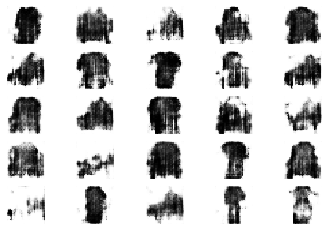

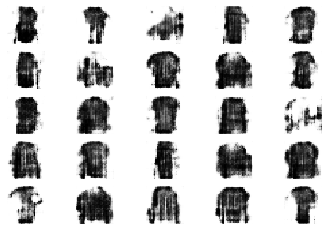

EPOCH: 1
2 0.65386915 0.722706 0.78361964
2 0.66163325 0.6321337 0.8398751
2 0.69813603 0.6168026 0.86902213
2 0.7146133 0.6111976 0.862844
2 0.71716857 0.6284775 0.856828
2 0.69840366 0.6274853 0.839775
2 0.72560245 0.6390298 0.8127395
2 0.6965395 0.6481308 0.7877119
2 0.71271944 0.66991484 0.7672944
2 0.657258 0.67066 0.756055
2 0.66624916 0.6459644 0.7646789
2 0.6610004 0.6550113 0.7811935
2 0.6537883 0.6399091 0.78034496
2 0.6381466 0.6621553 0.78907657
2 0.64434123 0.68089545 0.76919204
2 0.6630652 0.6715498 0.76175165
2 0.64866847 0.7066932 0.7415849
2 0.6777922 0.70860875 0.72346663
2 0.68289655 0.72209805 0.71955794
2 0.67742884 0.7057609 0.7505156
2 0.69662285 0.6853684 0.79187626
2 0.6915623 0.63371885 0.8042131
2 0.70597327 0.62700343 0.8429786
2 0.6726067 0.614599 0.86462164
2 0.6732937 0.6251337 0.8179849
2 0.71765983 0.64950097 0.7901259
2 0.6907605 0.6925284 0.7593786
2 0.6704302 0.68229884 0.7499207
2 0.68197197 0.6697444 0.7616734
2 0.66356057 0.6486759 0.7951559
2 0.6

2 0.64283085 0.6699065 0.77634037
2 0.6647959 0.68444085 0.732713
2 0.6244066 0.65766346 0.75608814
2 0.65243566 0.6855202 0.76029456
2 0.6953008 0.6318852 0.79469585
2 0.6658027 0.6496144 0.8321012
2 0.686029 0.6353452 0.8502707
2 0.65918624 0.61210024 0.8588235
2 0.66822684 0.6031465 0.830013
2 0.68938506 0.62313616 0.8057761
2 0.6765537 0.65344924 0.7829855
2 0.6832887 0.6713222 0.7882972
2 0.6510344 0.66207623 0.7854351
2 0.6519011 0.6387688 0.80877805
2 0.6461898 0.6323397 0.79596174
2 0.6508526 0.63871145 0.80356866
2 0.6464052 0.64354205 0.78599584
2 0.64570135 0.67938465 0.78150034
2 0.65887666 0.6710392 0.78768337
2 0.66231734 0.66842514 0.78383625
2 0.6538348 0.6541549 0.79998463
2 0.66389465 0.6628994 0.80850124
2 0.64131725 0.6278505 0.8081435
2 0.6784444 0.630576 0.8489481
2 0.6888799 0.59329015 0.8443651
2 0.6738609 0.623736 0.85778165
2 0.7362041 0.6148052 0.821275
2 0.67847437 0.6357222 0.793833
2 0.67670536 0.6755483 0.7822513
2 0.6686218 0.6481484 0.7766822
2 0.677572

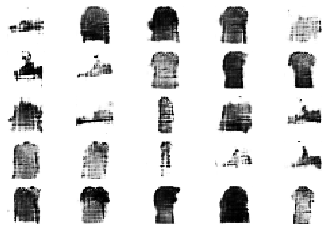

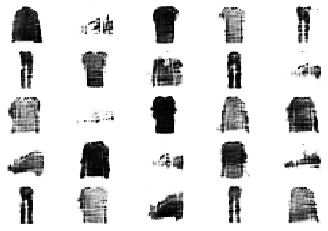

EPOCH: 2
3 0.7119288 0.6611724 0.7870414
3 0.70467365 0.6582042 0.7891692
3 0.7185226 0.65639627 0.75921375
3 0.71909297 0.67756444 0.7878862
3 0.6768129 0.65596914 0.7790811
3 0.70000684 0.65196776 0.765532
3 0.67548895 0.67693555 0.75811005
3 0.6717192 0.6592253 0.7435349
3 0.638158 0.69200873 0.7411617
3 0.6388968 0.6676111 0.7552655
3 0.6549754 0.6888635 0.75373197
3 0.64400375 0.64761215 0.7683574
3 0.6717425 0.643903 0.78452283
3 0.68444157 0.6540864 0.8024967
3 0.6731179 0.6144198 0.7845881
3 0.71445215 0.6661236 0.75400954
3 0.6632547 0.6918379 0.7463681
3 0.6668079 0.6966011 0.74976075
3 0.69066036 0.70412624 0.73173195
3 0.6522651 0.6979368 0.7775357
3 0.6702449 0.64798295 0.79234815
3 0.65742886 0.64884037 0.8055469
3 0.66470623 0.659238 0.7959683
3 0.69988126 0.6768649 0.7408899
3 0.63794595 0.7123592 0.73916185
3 0.65727293 0.7181072 0.7510681
3 0.68593967 0.673988 0.74393713
3 0.6742233 0.67919075 0.7985115
3 0.6839803 0.64948684 0.82142615
3 0.7207963 0.61020213 0.893433

3 0.6776633 0.6222248 0.8276539
3 0.706038 0.61073065 0.85794055
3 0.68539524 0.64685607 0.8450945
3 0.70581746 0.6434803 0.790064
3 0.69011414 0.7098443 0.7659289
3 0.665344 0.6846481 0.75950414
3 0.69700444 0.6559539 0.76105994
3 0.69047916 0.6844791 0.7763715
3 0.6697595 0.62877685 0.788505
3 0.6793726 0.6463125 0.781788
3 0.65505743 0.6753959 0.7698559
3 0.62659955 0.69483054 0.7512046
3 0.6379452 0.6954177 0.7288675
3 0.61548734 0.7120987 0.7326073
3 0.6799842 0.7244709 0.7368102
3 0.68407243 0.6908412 0.77861875
3 0.6844545 0.6247457 0.81356394
3 0.65221393 0.6336089 0.824902
3 0.6953337 0.6170148 0.8117431
3 0.68054473 0.65034676 0.81405854
3 0.7011189 0.6588353 0.7707622
3 0.66661376 0.66021955 0.7658682
3 0.6723534 0.7000811 0.7664355
3 0.6731022 0.6827835 0.77800065
3 0.66557306 0.6478666 0.768756
3 0.6773057 0.64123285 0.7929066
3 0.6562196 0.70889103 0.77429885
3 0.65745693 0.7090421 0.7721708
3 0.6403234 0.72495365 0.73937255
3 0.6777832 0.6675736 0.76038885
3 0.67059326 0

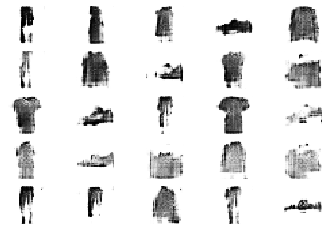

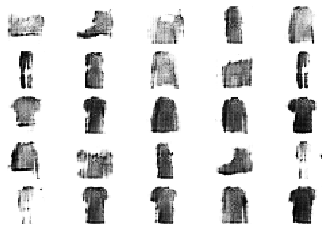

EPOCH: 3
4 0.6579498 0.68955106 0.753736
4 0.64418566 0.65557265 0.7638082
4 0.6548688 0.65854657 0.7784255
4 0.6556499 0.6683321 0.7892513
4 0.6676575 0.64930403 0.7416209
4 0.6394756 0.7517153 0.75729555
4 0.67066205 0.6915956 0.735269
4 0.65817374 0.6922928 0.7390032
4 0.6683385 0.6678435 0.76610255
4 0.68747413 0.67303693 0.7693939
4 0.6828679 0.65901375 0.8025028
4 0.6961497 0.6593478 0.7923807
4 0.67794454 0.6503548 0.7713377
4 0.6820824 0.6688599 0.79268146
4 0.6892257 0.6842921 0.76517195
4 0.66200393 0.6765669 0.76739186
4 0.69547033 0.6795273 0.75534725
4 0.6643198 0.6618843 0.7481275
4 0.65933067 0.6677716 0.7607317
4 0.66870534 0.646479 0.7665861
4 0.6533686 0.6598027 0.75765944
4 0.6807967 0.6893448 0.74696535
4 0.6567993 0.67365414 0.7440314
4 0.64218 0.6985292 0.7359116
4 0.6405458 0.6893145 0.7479272
4 0.68715656 0.68753463 0.73998106
4 0.64199626 0.69215053 0.75602335
4 0.6508223 0.65084124 0.77225596
4 0.6579362 0.67059195 0.7792331
4 0.65956205 0.6724685 0.7691862
4 

4 0.66920775 0.67929286 0.7562915
4 0.64791936 0.6487472 0.7605897
4 0.64552945 0.6697041 0.75506604
4 0.6593852 0.66938114 0.7566447
4 0.67556334 0.6871948 0.7563714
4 0.6667074 0.6872188 0.754747
4 0.6910933 0.6491872 0.73639834
4 0.69687384 0.6731463 0.75811577
4 0.69499743 0.6701833 0.7721338
4 0.66559863 0.66072303 0.7420784
4 0.6319937 0.6875191 0.74960434
4 0.62137103 0.6920481 0.74195
4 0.6554662 0.6737143 0.72918594
4 0.6324558 0.6955732 0.74603546
4 0.6601117 0.67368317 0.76808095
4 0.66978025 0.6899102 0.7650305
4 0.6611612 0.67102945 0.77932453
4 0.66259885 0.6731001 0.74425066
4 0.6611004 0.6598723 0.7558775
4 0.6586419 0.66667056 0.74924
4 0.674575 0.6893705 0.7438379
4 0.64195096 0.6969317 0.7361437
4 0.67337084 0.6863233 0.7520275
4 0.63936996 0.6832688 0.75764215
4 0.6553443 0.6581602 0.78885543
4 0.6430483 0.6740691 0.76527524
4 0.63764393 0.68287677 0.7662494
4 0.667698 0.71636 0.7718464
4 0.67607784 0.6964571 0.77413756
4 0.7121588 0.6472009 0.8009672
4 0.6760069 0.

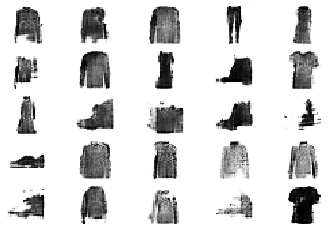

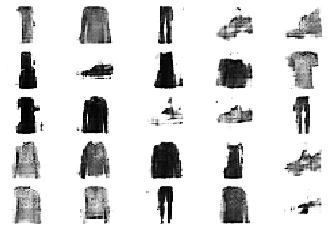

EPOCH: 4
5 0.7148161 0.6378392 0.8006807
5 0.67896664 0.664395 0.7842325
5 0.66295624 0.6725694 0.7781839
5 0.6700734 0.68435574 0.75456655
5 0.640613 0.68167305 0.79000825
5 0.6405301 0.6498271 0.7695488
5 0.6980836 0.66206264 0.7618255
5 0.6678331 0.6478766 0.75966454
5 0.6644387 0.6490754 0.78031033
5 0.6884201 0.6534237 0.73696417
5 0.64898336 0.7070248 0.7448578
5 0.6321072 0.677587 0.7383229
5 0.6506541 0.67280793 0.7319006
5 0.6660368 0.6860051 0.75830114
5 0.633742 0.67221427 0.7685854
5 0.6583206 0.6576028 0.76469827
5 0.6621176 0.67417586 0.7507554
5 0.6664537 0.6776849 0.759603
5 0.6561044 0.6661024 0.7674521
5 0.64742905 0.6810868 0.7718828
5 0.67315406 0.6816672 0.7529187
5 0.62842596 0.645231 0.7707486
5 0.6908504 0.6815426 0.7710707
5 0.67519796 0.677534 0.7682458
5 0.66333973 0.67650396 0.7424943
5 0.662939 0.685363 0.77559304
5 0.66217846 0.6556156 0.76153857
5 0.68677413 0.6747551 0.7539232
5 0.6717006 0.6304455 0.7936743
5 0.67550784 0.65260863 0.7903333
5 0.6642944 

5 0.66392523 0.6587051 0.7687639
5 0.64446056 0.6773078 0.7961394
5 0.66182745 0.6611693 0.77869487
5 0.677168 0.64557475 0.79661864
5 0.64587975 0.65284944 0.75793666
5 0.6618818 0.6501858 0.76933587
5 0.62802386 0.65815204 0.77090704
5 0.7002876 0.6677051 0.7725667
5 0.7215301 0.65009236 0.7776099
5 0.7135161 0.6730895 0.79075855
5 0.7090122 0.6653767 0.76955193
5 0.67858946 0.6497683 0.77813727
5 0.67150533 0.6541852 0.7932091
5 0.6659092 0.6310259 0.7876837
5 0.6623907 0.67051256 0.7696532
5 0.72743917 0.6688701 0.7848214
5 0.69481313 0.6514925 0.783861
5 0.6799613 0.68173116 0.7908045
5 0.66968596 0.65334386 0.77912676
5 0.66629124 0.63970506 0.7733667
5 0.6584739 0.6617807 0.754066
5 0.6743561 0.6545262 0.7810714
5 0.70881814 0.67635155 0.78186786
5 0.6974746 0.6318235 0.77865607
5 0.6785351 0.6799121 0.7912195
5 0.6749799 0.6518786 0.8236147
5 0.6981336 0.61003256 0.8282424
5 0.6975221 0.646914 0.80317736
5 0.64167607 0.64133084 0.8080747
5 0.6925508 0.6805222 0.7735872
5 0.6809

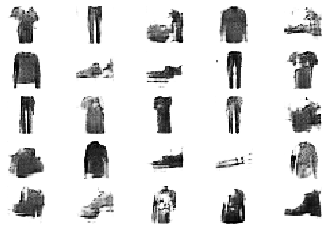

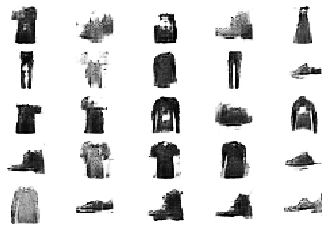

EPOCH: 5
6 0.6737819 0.6626649 0.75797474
6 0.6622077 0.7074494 0.7718718
6 0.69443417 0.69848967 0.7538307
6 0.68460965 0.64030266 0.7421557
6 0.6713234 0.66684866 0.7439859
6 0.6752898 0.6794982 0.7655268
6 0.68257725 0.6797726 0.75451887
6 0.66726893 0.6861985 0.7605198
6 0.6631428 0.6791744 0.7655756
6 0.6817548 0.6639113 0.7619478
6 0.6680616 0.6591848 0.77250874
6 0.661356 0.65180147 0.7832264
6 0.688292 0.64236563 0.7797384
6 0.6929537 0.6876112 0.7684663
6 0.6895805 0.66737485 0.77827513
6 0.67515075 0.6678005 0.7775288
6 0.6791476 0.65813464 0.78111744
6 0.6726767 0.6947272 0.7838981
6 0.7037434 0.6684298 0.7520475
6 0.64543307 0.6897412 0.739553
6 0.6694525 0.66927266 0.73811066
6 0.6312054 0.70762837 0.74774444
6 0.66270804 0.67083895 0.75643456
6 0.699414 0.6883855 0.7945968
6 0.67962116 0.6636861 0.80439514
6 0.7026225 0.6629826 0.79003584
6 0.71929556 0.6522136 0.79409355
6 0.71294653 0.66812927 0.75765073
6 0.7195942 0.6882211 0.7628882
6 0.6835797 0.67359954 0.77169937


6 0.6899024 0.6802966 0.7200649
6 0.6552059 0.71286273 0.73355365
6 0.68023455 0.71295154 0.73621917
6 0.6679474 0.6797203 0.7506603
6 0.6633638 0.66697264 0.7798673
6 0.6781566 0.66469586 0.7792553
6 0.669947 0.66159856 0.76011264
6 0.6738795 0.6652591 0.7416667
6 0.6788856 0.710441 0.7174899
6 0.69392514 0.69959533 0.7173014
6 0.65241194 0.7202568 0.74953717
6 0.69274294 0.6853212 0.7840996
6 0.6775695 0.6278304 0.77831846
6 0.69208026 0.67738914 0.7923051
6 0.6577277 0.65000486 0.8075678
6 0.7089703 0.66612464 0.77803046
6 0.6651691 0.69508743 0.7616869
6 0.71040976 0.68863744 0.7583129
6 0.66481453 0.6917714 0.75261235
6 0.64926535 0.678808 0.7493844
6 0.67669684 0.66449946 0.77156824
6 0.6769324 0.69574326 0.78717965
6 0.6492181 0.6853128 0.76983255
6 0.6218101 0.6739645 0.76542234
6 0.66992366 0.6951142 0.7341337
6 0.66076714 0.6850307 0.7596758
6 0.6687792 0.646432 0.74191904
6 0.710123 0.67367136 0.79835105
6 0.69429207 0.6441912 0.82481134
6 0.6715679 0.64701384 0.8324607
6 0.

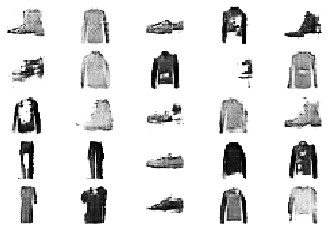

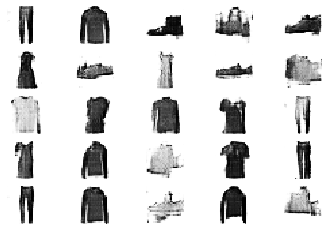

EPOCH: 6
7 0.6215409 0.69046474 0.77136886
7 0.648673 0.7018518 0.7487458
7 0.6510019 0.71869564 0.7240889
7 0.688827 0.7201034 0.7386678
7 0.68477476 0.692518 0.75466144
7 0.661566 0.6526774 0.8153394
7 0.70737284 0.5994773 0.886282
7 0.6884765 0.60683733 0.9077587
7 0.6935338 0.64012706 0.8780487
7 0.7173456 0.6629687 0.81634796
7 0.7037785 0.68658364 0.75955796
7 0.67458546 0.7610092 0.7417828
7 0.6671252 0.68253464 0.76314783
7 0.7102814 0.6388729 0.8157532
7 0.6678839 0.62617224 0.84947217
7 0.6418226 0.6004634 0.83634883
7 0.6761254 0.64512116 0.8126775
7 0.6750615 0.67029405 0.7818364
7 0.6792948 0.6763055 0.7363509
7 0.650205 0.707926 0.7419628
7 0.6387147 0.68534076 0.74329776
7 0.69430435 0.68931663 0.77362305
7 0.6809669 0.6485228 0.8036644
7 0.6520623 0.6328336 0.8626436
7 0.69568855 0.6380541 0.78874683
7 0.7012626 0.630303 0.7800088
7 0.6437381 0.67107 0.81457007
7 0.67958456 0.7077781 0.71866715
7 0.68903494 0.6987196 0.7583047
7 0.6647575 0.67400146 0.7619884
7 0.676494

7 0.678474 0.6306981 0.7631692
7 0.66504467 0.7140777 0.7576276
7 0.69313884 0.7177526 0.73158336
7 0.65022856 0.6866199 0.7368168
7 0.68263745 0.69084406 0.74779963
7 0.688526 0.6571534 0.80950296
7 0.66348505 0.63486874 0.79590076
7 0.6812302 0.6338849 0.829481
7 0.69781506 0.65316474 0.78285444
7 0.6781101 0.70113385 0.7442232
7 0.6925626 0.7159517 0.74995434
7 0.6650559 0.70854723 0.7490357
7 0.6686647 0.6744974 0.766967
7 0.6317488 0.6788544 0.7655028
7 0.6559933 0.6900074 0.76345706
7 0.70082796 0.6961634 0.7642148
7 0.6876377 0.66443384 0.72592366
7 0.6874012 0.68126917 0.72976017
7 0.67427695 0.69577414 0.7228818
7 0.6587825 0.6757264 0.76498383
7 0.6452 0.660501 0.75575566
7 0.6570575 0.6730744 0.7956498
7 0.7142645 0.63684106 0.79239017
7 0.6468694 0.6731584 0.7794014
7 0.7276688 0.63327074 0.77952963
7 0.6800047 0.67137253 0.75278556
7 0.68206096 0.6571149 0.75568795
7 0.69346505 0.6758686 0.74590755
7 0.6777266 0.65659505 0.74691486
7 0.6692773 0.6741843 0.7509634
7 0.67042

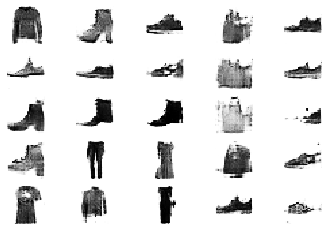

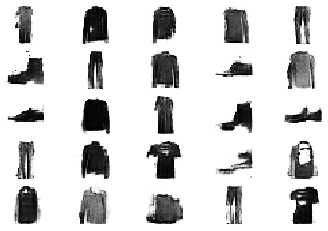

EPOCH: 7
8 0.7148222 0.65826154 0.80969757
8 0.68480414 0.66858613 0.7749705
8 0.6777175 0.65407693 0.75594884
8 0.6866653 0.7277643 0.73830795
8 0.7112987 0.6687582 0.78896445
8 0.6794258 0.66419435 0.76752675
8 0.66011715 0.63259614 0.7696402
8 0.65490294 0.6561513 0.75663865
8 0.68683755 0.6809842 0.75525856
8 0.6632431 0.6987124 0.75937814
8 0.6850029 0.6721698 0.7597649
8 0.6740881 0.65375394 0.7898782
8 0.68919784 0.65698326 0.7771308
8 0.68550164 0.66824734 0.75874865
8 0.6878761 0.6744932 0.7735369
8 0.66227764 0.6808063 0.7471785
8 0.68027383 0.66622865 0.7664015
8 0.6794158 0.67337203 0.7823291
8 0.69085544 0.64213115 0.76052153
8 0.6563125 0.6787428 0.76865405
8 0.6749367 0.66420597 0.7606033
8 0.6889256 0.66031635 0.75287974
8 0.6706808 0.6749892 0.74614537
8 0.66664004 0.66271263 0.7496626
8 0.6743811 0.64636964 0.756397
8 0.6371264 0.65662277 0.75705624
8 0.6524584 0.67930377 0.76103413
8 0.6758666 0.68731874 0.74076927
8 0.6453763 0.7032185 0.7508619
8 0.66037893 0.67847

8 0.65883243 0.6943821 0.740185
8 0.66971576 0.69757175 0.77691597
8 0.6880652 0.65522254 0.7960844
8 0.6800964 0.62472284 0.7788671
8 0.71149635 0.63482714 0.7877199
8 0.69536877 0.6561769 0.7398327
8 0.67212737 0.66224736 0.7299466
8 0.6955873 0.69286567 0.7292338
8 0.676785 0.6672262 0.7291404
8 0.6542492 0.6818226 0.7642973
8 0.65974 0.70842624 0.7264701
8 0.6432149 0.69815624 0.74237186
8 0.6709515 0.66514266 0.741037
8 0.6949618 0.69271207 0.7586795
8 0.6677559 0.6927689 0.74191874
8 0.6791339 0.6683831 0.7201264
8 0.6764097 0.6942149 0.74545693
8 0.69334245 0.6793815 0.7289959
8 0.6531785 0.69157314 0.7532848
8 0.6620015 0.69727147 0.7519081
8 0.673815 0.6673025 0.73016137
8 0.66726017 0.70168924 0.74488664
8 0.66795003 0.6839458 0.75584525
8 0.67181337 0.68753654 0.74762
8 0.66202736 0.68246704 0.74961734
8 0.6627629 0.659189 0.7488575
8 0.68894565 0.66383284 0.75878984
8 0.6750556 0.7120849 0.74250865
8 0.6739441 0.6869394 0.7595845
8 0.69509953 0.67853695 0.7635093
8 0.678041

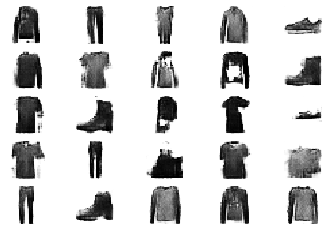

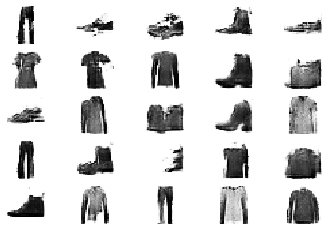

EPOCH: 8
9 0.63641024 0.67914367 0.74384713
9 0.65814126 0.72548556 0.73307467
9 0.69654095 0.67372864 0.7815047
9 0.693018 0.6550307 0.7788067
9 0.69906294 0.6270273 0.7993509
9 0.650161 0.6743681 0.7605145
9 0.67157674 0.68547815 0.7479317
9 0.6799103 0.67345303 0.71908385
9 0.67202896 0.6859099 0.7523606
9 0.65286976 0.6448722 0.7739711
9 0.67432714 0.65154666 0.7968729
9 0.6988547 0.7063123 0.74326146
9 0.6517951 0.66674733 0.7395824
9 0.6864658 0.6929834 0.7453882
9 0.6887917 0.69598484 0.7380818
9 0.65022135 0.65336096 0.76545453
9 0.67690325 0.6468544 0.78250325
9 0.6682925 0.66845703 0.77280885
9 0.6925378 0.6877064 0.7622945
9 0.69249713 0.6879496 0.7564033
9 0.67957675 0.67483354 0.73098195
9 0.6374093 0.6874539 0.7469326
9 0.68697757 0.66819245 0.73598135
9 0.6428857 0.7088419 0.74191356
9 0.67693913 0.7048396 0.73915154
9 0.65921736 0.7191726 0.72043216
9 0.6735875 0.7051704 0.7506626
9 0.67204225 0.6647143 0.77825344
9 0.69768417 0.68464017 0.77933645
9 0.6732993 0.6996651

9 0.68632156 0.6595408 0.75551915
9 0.65839744 0.69495726 0.77304727
9 0.67947316 0.6747698 0.7516986
9 0.67537856 0.68072784 0.74127185
9 0.6537404 0.6607424 0.727629
9 0.6803464 0.71262884 0.7410259
9 0.68781173 0.6598325 0.7994211
9 0.692633 0.6402911 0.8002486
9 0.6646495 0.6787574 0.80061996
9 0.7171613 0.6304809 0.7771406
9 0.7047378 0.67090154 0.76826954
9 0.6660054 0.68445754 0.7551687
9 0.6971552 0.6818261 0.7385125
9 0.7023324 0.6754765 0.7780289
9 0.64993155 0.6672375 0.78949356
9 0.65844893 0.645366 0.7825456
9 0.68898845 0.6734397 0.76938546
9 0.66579676 0.6672675 0.7338351
9 0.69413686 0.6812142 0.7528515
9 0.6832576 0.6784901 0.7772424
9 0.68419296 0.6494646 0.7962385
9 0.66166186 0.66365325 0.7826835
9 0.67642033 0.6457635 0.78024226
9 0.66404414 0.6763015 0.7601775
9 0.67360604 0.6758425 0.76795155
9 0.669811 0.69270337 0.75485647
9 0.6474063 0.6819693 0.7472459
9 0.6641363 0.6712804 0.7664423
9 0.6732935 0.6784673 0.7591745
9 0.6782546 0.6517287 0.75352526
9 0.6794625

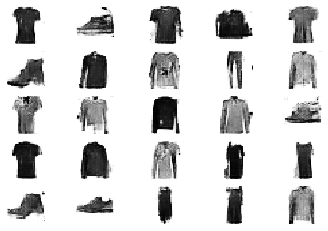

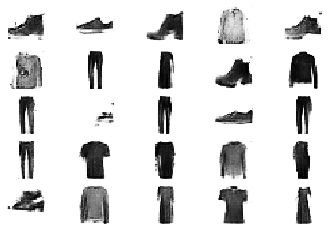

EPOCH: 9
10 0.67179465 0.6586554 0.7474693
10 0.71241236 0.6573082 0.74776983
10 0.65528774 0.6614801 0.7440065
10 0.70299816 0.70672894 0.76234496
10 0.66794 0.6773717 0.75615954
10 0.66602206 0.68672013 0.7647661
10 0.64948004 0.64835346 0.7760082
10 0.7043804 0.6722039 0.75705
10 0.65307397 0.69803476 0.7256551
10 0.68005335 0.7473954 0.74067444
10 0.68303645 0.6403372 0.7600359
10 0.68976676 0.67282087 0.7854787
10 0.6817732 0.6286752 0.8214982
10 0.7110838 0.6478183 0.784182
10 0.68354774 0.687853 0.74705863
10 0.6751704 0.6767155 0.73594576
10 0.6421791 0.6768241 0.770762
10 0.69334906 0.65534365 0.772781
10 0.6361016 0.6666423 0.7593008
10 0.6971904 0.7152071 0.7553605
10 0.6647148 0.6942159 0.73546284
10 0.69484156 0.6696991 0.7417651
10 0.65532315 0.6761102 0.74709195
10 0.6738539 0.67801976 0.78106725
10 0.6783852 0.6920332 0.79011345
10 0.67680186 0.6791007 0.75938153
10 0.6625587 0.6705889 0.75508857
10 0.6685053 0.67456996 0.7609312
10 0.68932736 0.6638194 0.7631066
10 0.6

10 0.6607219 0.69350123 0.7495009
10 0.69842446 0.667803 0.7263096
10 0.67624503 0.66544044 0.7590598
10 0.64969516 0.70303595 0.7572632
10 0.692133 0.68488157 0.76192546
10 0.7018496 0.6578578 0.7763616
10 0.69627106 0.6903733 0.77083915
10 0.69397086 0.652746 0.75760204
10 0.6666145 0.6798254 0.7611557
10 0.68468004 0.67358387 0.7503112
10 0.63211304 0.6682416 0.76782227
10 0.6757679 0.68751544 0.75427675
10 0.6599247 0.67728764 0.74980587
10 0.6848041 0.6862759 0.7742417
10 0.676695 0.66930926 0.7568265
10 0.6768541 0.6645564 0.7580426
10 0.66688985 0.69038814 0.75844824
10 0.6670215 0.6706406 0.76605403
10 0.67796856 0.66332173 0.7342868
10 0.6777811 0.6948076 0.7280214
10 0.647275 0.6974201 0.7393435
10 0.6552936 0.6798266 0.75369334
10 0.6902206 0.67037445 0.7509831
10 0.678714 0.67661166 0.7345949
10 0.69105816 0.68310213 0.74960715
10 0.67514503 0.67170763 0.70984596
10 0.68637466 0.7145575 0.74679875
10 0.69235635 0.6835886 0.75003403
10 0.6779206 0.6791671 0.7419332
10 0.6709

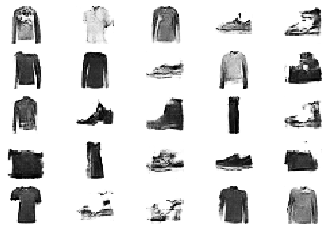

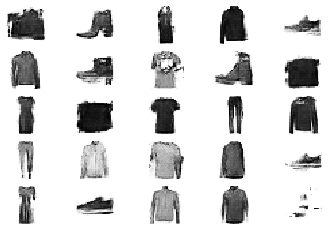

EPOCH: 10
11 0.6813472 0.6764797 0.7529515
11 0.67792904 0.6529434 0.7453157
11 0.69414115 0.68269026 0.7405388
11 0.6781858 0.6737322 0.73255146
11 0.68626213 0.66295326 0.74958867
11 0.7003408 0.6761324 0.7219696
11 0.6736839 0.675241 0.76389414
11 0.6757375 0.68064153 0.73805946
11 0.6670954 0.7008279 0.7518755
11 0.6856959 0.730731 0.7405237
11 0.6811101 0.6797831 0.750769
11 0.6986964 0.6945659 0.757565
11 0.6517158 0.6801388 0.76691973
11 0.68859935 0.7077058 0.73537827
11 0.6756931 0.704229 0.7473688
11 0.6647868 0.67292196 0.78160095
11 0.69226384 0.7189026 0.76563895
11 0.70404255 0.6586411 0.75821453
11 0.68981373 0.6665001 0.7704192
11 0.6968577 0.67556894 0.7554517
11 0.68087876 0.7048329 0.7663897
11 0.6840851 0.6680721 0.7475369
11 0.68288136 0.6538472 0.74227333
11 0.6813016 0.68443274 0.7456248
11 0.6697831 0.6948339 0.72909284
11 0.6751604 0.70257026 0.7619557
11 0.6899915 0.6690975 0.7646812
11 0.6655811 0.6729455 0.74368846
11 0.67933154 0.6629572 0.74440324
11 0.707

11 0.6761329 0.69443345 0.7324619
11 0.6942482 0.67698294 0.74462026
11 0.66651464 0.6870533 0.7757209
11 0.6947078 0.6542201 0.7866969
11 0.6816113 0.6508325 0.77764654
11 0.6926347 0.643485 0.7544751
11 0.7080114 0.6923443 0.7491552
11 0.7003987 0.6768521 0.74540347
11 0.67619205 0.67454576 0.76662946
11 0.68177795 0.6467784 0.7967978
11 0.6753907 0.63813865 0.80572486
11 0.65757525 0.6828855 0.73981106
11 0.6432326 0.70428663 0.7413248
11 0.6596187 0.72659624 0.7305113
11 0.64896286 0.7308569 0.73870075
11 0.67629164 0.6476799 0.8086344
11 0.68912846 0.5935578 0.879387
11 0.74528635 0.58244216 0.8676498
11 0.7150946 0.62698376 0.82576156
11 0.72431386 0.69814813 0.76042914
11 0.6970747 0.7196622 0.7483399
11 0.684982 0.70342755 0.74991274
11 0.66766167 0.66013265 0.77699494
11 0.66410285 0.65330493 0.789908
11 0.6927148 0.6649852 0.7956128
11 0.6984657 0.6950149 0.7564094
11 0.6657367 0.66592556 0.75310606
11 0.6652384 0.6874182 0.76125443
11 0.64707637 0.681462 0.7543714
11 0.67546

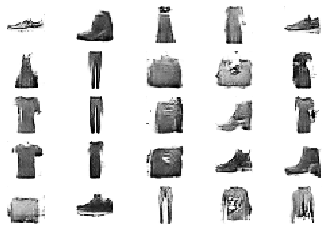

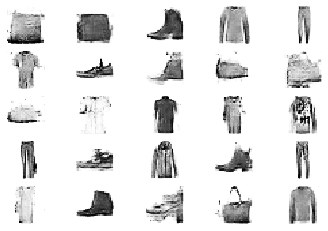

EPOCH: 11
12 0.67708665 0.63591397 0.78456306
12 0.6289417 0.68105865 0.77769595
12 0.65298086 0.6896614 0.75123644
12 0.707552 0.6907488 0.7428152
12 0.69019127 0.70325667 0.74375063
12 0.66941994 0.6872777 0.7638776
12 0.6601256 0.6135188 0.79024094
12 0.7029575 0.6249613 0.78337777
12 0.6708673 0.6557579 0.7791267
12 0.6755308 0.6904068 0.76468396
12 0.69054365 0.68394244 0.73848784
12 0.6982882 0.6760656 0.7367285
12 0.6618799 0.6862606 0.7420025
12 0.66069925 0.662258 0.7799501
12 0.6840086 0.66084623 0.77563405
12 0.66396487 0.6567204 0.7464563
12 0.68372226 0.68953395 0.76000977
12 0.6719156 0.7026595 0.74637944
12 0.6768292 0.6858727 0.73956096
12 0.66423565 0.6377385 0.74248004
12 0.6712911 0.6655606 0.7629987
12 0.6554234 0.6995717 0.73227227
12 0.66643184 0.68539035 0.7360979
12 0.68925583 0.67068076 0.7684853
12 0.6708391 0.66272783 0.74393594
12 0.67271066 0.6961038 0.7576841
12 0.67714274 0.7193359 0.74461514
12 0.7076907 0.6754495 0.7504289
12 0.679593 0.7018273 0.757408

12 0.6722448 0.63976467 0.74485385
12 0.6709533 0.665468 0.7510352
12 0.6908383 0.6698729 0.7399029
12 0.6542904 0.6717312 0.74820745
12 0.6651461 0.7100353 0.7370156
12 0.67722106 0.67836934 0.7528357
12 0.67431897 0.66657877 0.7623034
12 0.71637064 0.675531 0.74228156
12 0.6623541 0.6673054 0.73429453
12 0.66726303 0.67941844 0.75317043
12 0.66701907 0.6730027 0.75026643
12 0.707077 0.68013227 0.76447743
12 0.6788109 0.7115452 0.75924134
12 0.7059379 0.66647524 0.75143844
12 0.6658931 0.66803163 0.743876
12 0.6793186 0.66175246 0.7362463
12 0.64816874 0.67262954 0.7701727
12 0.6917504 0.69069463 0.73847187
12 0.66135615 0.6744076 0.7463053
12 0.6708195 0.69307625 0.75032383
12 0.72747016 0.69914734 0.7468742
12 0.6766993 0.6758107 0.7416063
12 0.683708 0.6849085 0.7445182
12 0.69600147 0.7107028 0.7311268
12 0.68860376 0.68263316 0.7564445
12 0.6449946 0.65282345 0.75920147
12 0.6611324 0.67111516 0.7514873
12 0.7073935 0.6465624 0.7395048
12 0.67099476 0.6988833 0.7311305
12 0.69502

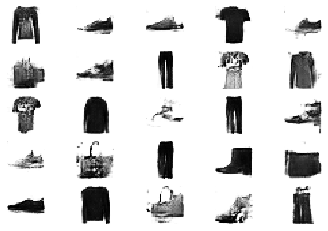

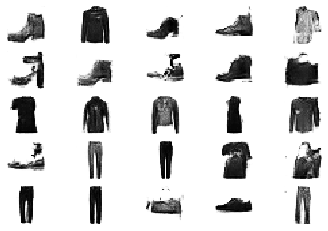

EPOCH: 12
13 0.6878227 0.6801001 0.763653
13 0.6919025 0.6617875 0.7767986
13 0.6756284 0.6784961 0.75083834
13 0.68764865 0.7131034 0.762618
13 0.6909317 0.6613586 0.7415217
13 0.6580553 0.6521252 0.7408944
13 0.71560013 0.7036365 0.73967904
13 0.66453964 0.69486415 0.76331574
13 0.64721864 0.66805255 0.7715845
13 0.6875396 0.6505035 0.75839204
13 0.6507807 0.6680627 0.7556174
13 0.66422856 0.7118993 0.7356801
13 0.6843345 0.70313305 0.7390983
13 0.70484036 0.6910954 0.77762455
13 0.68244326 0.6358758 0.80253726
13 0.67716193 0.6707173 0.7842401
13 0.7226501 0.72711873 0.76784384
13 0.69743824 0.6835425 0.75381035
13 0.6895159 0.6677102 0.75494176
13 0.69550097 0.66502523 0.76652646
13 0.66474384 0.6503768 0.7678688
13 0.6850271 0.6673226 0.7684525
13 0.6748761 0.6827313 0.7306353
13 0.69293356 0.6739844 0.7427161
13 0.66777015 0.68864095 0.7642933
13 0.6754325 0.6654745 0.7788382
13 0.68405175 0.68134344 0.75061315
13 0.67842424 0.6903439 0.7404271
13 0.66740525 0.691053 0.7577073
13

13 0.68757707 0.6741712 0.7359547
13 0.71136165 0.68882996 0.74452245
13 0.6903852 0.6702721 0.76011676
13 0.6936406 0.65361303 0.76397955
13 0.71449876 0.64360046 0.77387726
13 0.68501174 0.66425276 0.773665
13 0.6840203 0.6738789 0.7739346
13 0.6941206 0.6798554 0.752306
13 0.68884236 0.6837015 0.7602546
13 0.6976722 0.6796028 0.7472417
13 0.68228096 0.66893667 0.7254053
13 0.6544968 0.65092355 0.7536011
13 0.66282415 0.7019645 0.7511178
13 0.69291425 0.6933627 0.7518702
13 0.67228293 0.683377 0.7493216
13 0.6913371 0.65086395 0.7559352
13 0.7141318 0.6848676 0.7708608
13 0.67884314 0.68710744 0.7512538
13 0.66968226 0.6878748 0.73986983
13 0.67174244 0.68723464 0.77138317
13 0.6427398 0.67637336 0.7492058
13 0.6672506 0.65531254 0.763372
13 0.6587681 0.64873457 0.73976487
13 0.70872474 0.65149647 0.7633308
13 0.6967832 0.64292926 0.7722882
13 0.6986745 0.6810534 0.74362725
13 0.6936077 0.66240895 0.7404099
13 0.68742156 0.68599015 0.7471324
13 0.70622474 0.67643523 0.7431939
13 0.67

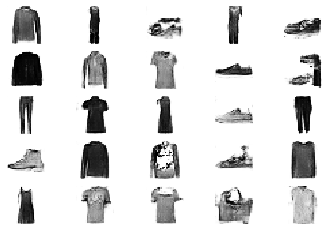

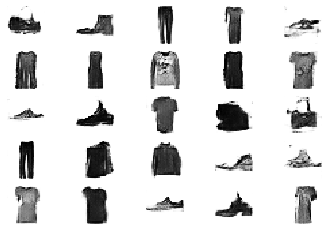

EPOCH: 13
14 0.68469226 0.6730925 0.74061286
14 0.64787626 0.683483 0.73104024
14 0.6766573 0.6879473 0.7346717
14 0.6768327 0.7017795 0.7423656
14 0.6614446 0.6575558 0.75042987
14 0.68529516 0.66147554 0.7600231
14 0.64970887 0.6612491 0.75511485
14 0.7047984 0.67929 0.75601304
14 0.67786527 0.66858274 0.73239166
14 0.6926345 0.65986645 0.77573836
14 0.6811088 0.6403432 0.7748295
14 0.67220414 0.7031176 0.7453767
14 0.63086784 0.7252582 0.7165035
14 0.6670065 0.6889263 0.7297842
14 0.65127945 0.6658809 0.7491391
14 0.69049484 0.66873705 0.774726
14 0.7084677 0.6418996 0.78901196
14 0.6784019 0.65224195 0.7797282
14 0.6787796 0.6858343 0.7561332
14 0.7129731 0.6754023 0.754046
14 0.6820552 0.68182755 0.75568527
14 0.67798805 0.66201204 0.75764835
14 0.68197966 0.6913376 0.74436903
14 0.68282956 0.69765764 0.7382804
14 0.6864617 0.7028015 0.7343248
14 0.6650244 0.6847769 0.7343231
14 0.65893966 0.6944801 0.7521517
14 0.67568827 0.68261707 0.77795666
14 0.67329955 0.6704495 0.77560693
1

14 0.6954801 0.7006645 0.7490322
14 0.6696281 0.6903298 0.74213195
14 0.6537136 0.65304184 0.7455165
14 0.64763296 0.67769665 0.7542981
14 0.65748477 0.66913164 0.7250265
14 0.65655583 0.6857373 0.7335615
14 0.66473573 0.6850971 0.72313166
14 0.6658653 0.6788074 0.7505269
14 0.7148646 0.6596828 0.7523951
14 0.6877285 0.66450393 0.76754
14 0.6866704 0.65232646 0.75164413
14 0.67994094 0.6546738 0.7478818
14 0.6837876 0.70078826 0.7276591
14 0.6733674 0.67379475 0.7270968
14 0.6624696 0.70163906 0.7287203
14 0.6584163 0.7212277 0.7536105
14 0.6878103 0.6622243 0.75991356
14 0.6828883 0.68439287 0.75445175
14 0.6652276 0.68305385 0.76524866
14 0.6971264 0.7009158 0.75309706
14 0.6789512 0.670511 0.72898126
14 0.69140303 0.67489946 0.74417245
14 0.67363524 0.6898906 0.7644058
14 0.6821468 0.67026126 0.7448609
14 0.6730473 0.6892562 0.75433123
14 0.68110144 0.69085956 0.7614398
14 0.6829368 0.6933109 0.74557424
14 0.6646386 0.6873573 0.72669125
14 0.6745613 0.67979395 0.755948
14 0.6504642 

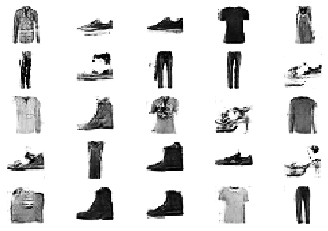

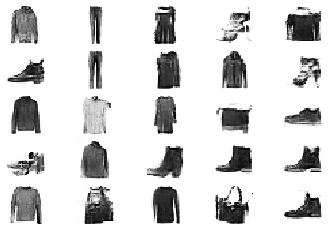

EPOCH: 14
15 0.6616896 0.6592669 0.7564424
15 0.68636763 0.65273225 0.7472102
15 0.7262144 0.68815804 0.7648207
15 0.7288078 0.6801049 0.74437827
15 0.6616888 0.67966807 0.8259014
15 0.69920576 0.65222764 0.78432363
15 0.6680709 0.6810119 0.7322488
15 0.67623883 0.700795 0.740074
15 0.6727555 0.6977587 0.76036584
15 0.6589386 0.6548054 0.78010386
15 0.6946283 0.6446488 0.78820175
15 0.68161196 0.6805314 0.76065034
15 0.72296894 0.7005045 0.74251294
15 0.682417 0.67930377 0.7358946
15 0.70526516 0.6779995 0.7376108
15 0.6924245 0.69268405 0.7410117
15 0.6658276 0.6896802 0.74026304
15 0.710032 0.69834757 0.74077046
15 0.66013515 0.654701 0.7465482
15 0.6858514 0.6910536 0.7411417
15 0.66652864 0.69698036 0.7585355
15 0.6542926 0.7181097 0.72890866
15 0.6469981 0.7125709 0.7570719
15 0.68077886 0.6810863 0.7691002
15 0.6678481 0.68181944 0.77130425
15 0.6955515 0.6608981 0.7443278
15 0.69252026 0.6785039 0.7488355
15 0.6811745 0.6864097 0.7448456
15 0.658983 0.67361045 0.7421738
15 0.707

15 0.6765232 0.67831385 0.778005
15 0.67476296 0.68432134 0.75010514
15 0.67217475 0.69705194 0.765373
15 0.6676809 0.6790781 0.749997
15 0.6691556 0.67432654 0.7596168
15 0.7138504 0.6750828 0.7596439
15 0.7451067 0.6739327 0.74772006
15 0.678864 0.68739426 0.74459684
15 0.74564976 0.70705265 0.7504183
15 0.67215306 0.67233115 0.7584527
15 0.65047306 0.6972537 0.7477981
15 0.6737455 0.6843072 0.7489443
15 0.6807623 0.6539193 0.75486684
15 0.6584474 0.64100766 0.75468165
15 0.6791098 0.6640092 0.76656765
15 0.69101465 0.6835174 0.7537458
15 0.64052236 0.67594576 0.7813409
15 0.6623713 0.67539865 0.75948447
15 0.717442 0.66445565 0.7598705
15 0.65299106 0.6710465 0.75656873
15 0.6595806 0.65456295 0.7639624
15 0.70776784 0.6729057 0.759678
15 0.6800164 0.65322745 0.7487174
15 0.67722785 0.6683891 0.7518438
15 0.66705257 0.6654618 0.77218497
15 0.65054727 0.6786922 0.76155645
15 0.68060976 0.6803378 0.75950587
15 0.6992763 0.680327 0.7739864
15 0.68921936 0.6983545 0.7590483
15 0.7076776

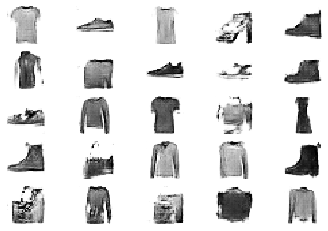

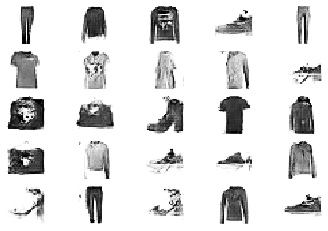

EPOCH: 15
16 0.66717863 0.68666255 0.7748438
16 0.6591308 0.6619001 0.76071405
16 0.7001125 0.68151176 0.7255567
16 0.6515208 0.6940867 0.7345557
16 0.6621871 0.7029291 0.73095816
16 0.6752863 0.69397676 0.7752217
16 0.67168134 0.6918429 0.7710483
16 0.70777595 0.70133495 0.758577
16 0.65624285 0.6848268 0.77184236
16 0.66496176 0.6595639 0.7765846
16 0.68758184 0.6664273 0.7324149
16 0.6932454 0.6858164 0.7526513
16 0.67455715 0.6579497 0.7312463
16 0.70183164 0.66421837 0.7335507
16 0.6695492 0.6865064 0.7318975
16 0.6795207 0.6834732 0.74935806
16 0.69157577 0.65635395 0.75104064
16 0.68539166 0.6792425 0.75180197
16 0.65424514 0.6714642 0.7508398
16 0.6911591 0.691538 0.7455161
16 0.6814492 0.6826161 0.7305609
16 0.6585072 0.6676122 0.74398285
16 0.7169845 0.703336 0.75642794
16 0.6966014 0.6828205 0.7592889
16 0.6889785 0.64762545 0.7618502
16 0.6548548 0.6656928 0.7615191
16 0.6872914 0.6799259 0.7471677
16 0.683511 0.6604586 0.7390089
16 0.6509669 0.68527436 0.7427548
16 0.67790

16 0.6579398 0.6883329 0.7758632
16 0.68084675 0.6701133 0.7763506
16 0.66599536 0.6719563 0.76012254
16 0.70348 0.6776595 0.7749653
16 0.70805943 0.65213495 0.79274815
16 0.6713073 0.65878963 0.77893007
16 0.680472 0.65076196 0.75398964
16 0.6783719 0.686841 0.7425484
16 0.67760205 0.7140947 0.74330837
16 0.68742776 0.65214115 0.74748456
16 0.6655013 0.6704436 0.76648986
16 0.67969227 0.6696436 0.73242474
16 0.7189926 0.6503899 0.75565726
16 0.702562 0.68970966 0.7552334
16 0.6894498 0.680684 0.7593477
16 0.65860623 0.67103505 0.7723689
16 0.6628865 0.6798674 0.7750298
16 0.680057 0.69003797 0.7493839
16 0.6877037 0.68210983 0.7319665
16 0.6726244 0.6878816 0.75678474
16 0.6877967 0.6719421 0.7756331
16 0.6874261 0.67080307 0.76204646
16 0.6590432 0.69301045 0.7823789
16 0.6992812 0.65544224 0.7532952
16 0.693807 0.6833128 0.74013543
16 0.6716565 0.70776296 0.75085187
16 0.6806752 0.6658224 0.74824625
16 0.6633511 0.6726234 0.7680263
16 0.691784 0.6971526 0.7588362
16 0.65969115 0.674

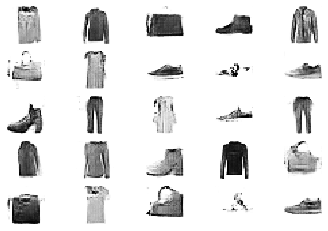

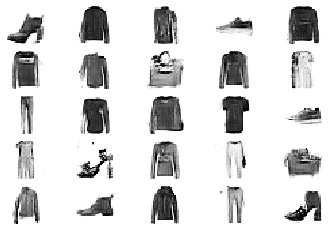

EPOCH: 16
17 0.67373025 0.6530008 0.7844654
17 0.6784648 0.6515901 0.777415
17 0.6906314 0.6578171 0.73696053
17 0.6959495 0.6781744 0.74774337
17 0.68280214 0.6788767 0.7739306
17 0.6802859 0.6865274 0.74448043
17 0.6461005 0.6672092 0.7549992
17 0.68956244 0.67869985 0.75645006
17 0.684853 0.6972523 0.769042
17 0.6895043 0.67505264 0.75053024
17 0.67567223 0.6707723 0.75547636
17 0.68003845 0.65638745 0.76218855
17 0.68682146 0.6647691 0.7551639
17 0.7026597 0.67333245 0.7420194
17 0.6650627 0.7078732 0.74309367
17 0.6604382 0.659351 0.72245187
17 0.66769606 0.6745336 0.72305375
17 0.6485819 0.71400094 0.74355435
17 0.6863308 0.67477715 0.7481608
17 0.690153 0.6893036 0.75911945
17 0.69427216 0.7000109 0.7716728
17 0.66029406 0.6937738 0.7378201
17 0.67953444 0.68746966 0.72796667
17 0.6666322 0.7017374 0.74407244
17 0.65153855 0.6842276 0.76370335
17 0.662219 0.6679821 0.7650632
17 0.6621251 0.6648857 0.7512109
17 0.6692687 0.6789052 0.7214223
17 0.6817672 0.67819625 0.7468092
17 0.

17 0.70714587 0.68759215 0.77177554
17 0.6515969 0.67121625 0.7696655
17 0.67551947 0.66550696 0.79016566
17 0.7249165 0.6492008 0.765894
17 0.6789894 0.69910127 0.75213754
17 0.7019373 0.680359 0.7470064
17 0.65954125 0.6583575 0.7562357
17 0.6693597 0.67019635 0.7470572
17 0.7167373 0.68413496 0.7338338
17 0.6809526 0.682482 0.7563619
17 0.6898569 0.68734956 0.7621486
17 0.6621697 0.6860032 0.76125723
17 0.6904143 0.68069184 0.7422261
17 0.66649497 0.6643518 0.7640412
17 0.66900146 0.693591 0.7392567
17 0.6935992 0.6870993 0.76619375
17 0.678419 0.6856072 0.7531188
17 0.67384994 0.65754104 0.7474784
17 0.6781091 0.69015014 0.7433518
17 0.682979 0.6493927 0.7320737
17 0.7085097 0.68819773 0.7429992
17 0.67492545 0.67557275 0.75262725
17 0.67768294 0.67174244 0.73679006
17 0.71259934 0.6740985 0.7519438
17 0.69982404 0.6944815 0.7506596
17 0.6733334 0.68520844 0.7483187
17 0.7078804 0.7055656 0.75320596
17 0.66867995 0.68856174 0.7617587
17 0.6715899 0.6664751 0.74903977
17 0.6625309 0

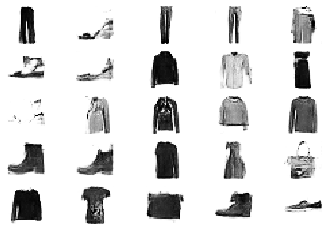

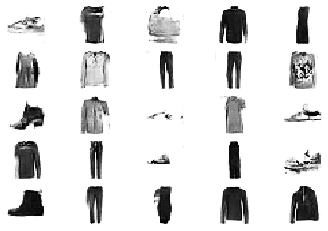

EPOCH: 17
18 0.6707324 0.6847758 0.7600357
18 0.6600013 0.70537424 0.7408796
18 0.66926885 0.6564543 0.7442574
18 0.7267152 0.65129626 0.7417655
18 0.66953707 0.6763477 0.7686554
18 0.6803619 0.6836173 0.73722833
18 0.65945715 0.6703082 0.76765615
18 0.6881809 0.6451126 0.77444863
18 0.70574456 0.6921679 0.7744595
18 0.69291294 0.6635401 0.7566135
18 0.7137878 0.6663202 0.75613517
18 0.7026542 0.664775 0.7694501
18 0.68543214 0.68385446 0.7351476
18 0.6750516 0.71972275 0.7612784
18 0.6957425 0.72782457 0.7546189
18 0.6684094 0.66831994 0.760664
18 0.6865894 0.666886 0.7692406
18 0.6716283 0.67388254 0.7241306
18 0.68300116 0.6499704 0.7596478
18 0.6799337 0.67682785 0.7622773
18 0.69911706 0.6539335 0.7390096
18 0.6844564 0.6595434 0.7456186
18 0.65898347 0.6706529 0.75766826
18 0.65152013 0.6747331 0.75301427
18 0.6763419 0.6829337 0.7565604
18 0.6567153 0.67106223 0.7498655
18 0.6944312 0.66047484 0.7569219
18 0.6994946 0.65625274 0.78889155
18 0.6923763 0.6347115 0.76183164
18 0.65

18 0.6977262 0.6609348 0.77811766
18 0.6855575 0.6825634 0.7557727
18 0.64951146 0.6718699 0.77313685
18 0.6674557 0.6905614 0.75290835
18 0.67543876 0.6774454 0.73127544
18 0.64663935 0.6685847 0.7480794
18 0.6582172 0.6757014 0.74967295
18 0.6833888 0.6751456 0.75801
18 0.68166673 0.68361014 0.7350577
18 0.69616854 0.669484 0.7729701
18 0.71671987 0.69219875 0.74493873
18 0.7202318 0.6932266 0.7565144
18 0.72035563 0.659456 0.76519
18 0.6683134 0.6727729 0.75500244
18 0.6668282 0.65543294 0.744098
18 0.68680704 0.67499465 0.75817037
18 0.68076456 0.68618894 0.741488
18 0.7127749 0.6663982 0.77023363
18 0.6839837 0.6794366 0.740808
18 0.7004564 0.66301894 0.7631167
18 0.6623166 0.65167713 0.7484093
18 0.6683476 0.68243927 0.767287
18 0.6804644 0.6963213 0.7426599
18 0.6928383 0.663755 0.7607219
18 0.6736627 0.67110443 0.72941065
18 0.6919178 0.6721849 0.7591549
18 0.6556767 0.6483573 0.7595328
18 0.6695816 0.6942081 0.7528573
18 0.6980111 0.68551654 0.7412008
18 0.6683233 0.6679859 0.

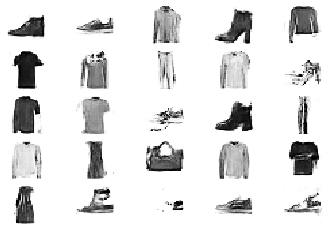

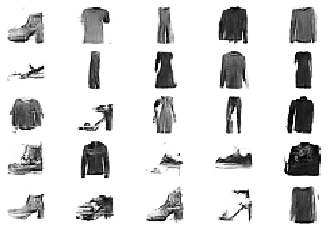

EPOCH: 18
19 0.7043989 0.65480614 0.75588965
19 0.6806762 0.6700301 0.76533043
19 0.6754214 0.65643406 0.76366585
19 0.7092422 0.6689434 0.7464969
19 0.72779185 0.656106 0.74784803
19 0.6806823 0.6611316 0.745075
19 0.70499367 0.6681659 0.7413508
19 0.64333665 0.6769129 0.7616493
19 0.68740857 0.67461133 0.75787055
19 0.6613215 0.6788015 0.7775942
19 0.6847146 0.67411464 0.77614313
19 0.7084316 0.69583166 0.7499094
19 0.6592381 0.65919566 0.7688768
19 0.68320096 0.69089174 0.7699011
19 0.6686542 0.69663334 0.75911707
19 0.70276237 0.6538084 0.74058795
19 0.65527534 0.68526226 0.74893165
19 0.6545032 0.67911947 0.75074893
19 0.7045866 0.6840671 0.75773394
19 0.6830355 0.6584743 0.7615387
19 0.7069807 0.68088305 0.7448602
19 0.6898836 0.66386425 0.76301605
19 0.67729664 0.69379693 0.7457075
19 0.691931 0.6773466 0.72730136
19 0.69383407 0.6947167 0.76744145
19 0.6983781 0.6863791 0.7726314
19 0.7076601 0.6874951 0.7516308
19 0.6918274 0.66714317 0.7507073
19 0.66702706 0.68120116 0.72193

19 0.6831573 0.6859814 0.7469472
19 0.6985083 0.6925036 0.76150715
19 0.68581176 0.6928078 0.7769628
19 0.7055092 0.66943663 0.7637266
19 0.7021071 0.65676785 0.74073637
19 0.66607344 0.6717821 0.75091237
19 0.64340055 0.6915393 0.75608104
19 0.6910032 0.6647577 0.7584074
19 0.6820384 0.6647241 0.7477153
19 0.69262844 0.6715957 0.73600173
19 0.7001108 0.67212915 0.7470852
19 0.66362774 0.6946815 0.735466
19 0.6802045 0.6593684 0.72893965
19 0.6824969 0.6558191 0.75742316
19 0.6672044 0.6695534 0.7653644
19 0.65507287 0.6845568 0.75027263
19 0.7013618 0.70524836 0.74641436
19 0.68131596 0.67106605 0.7326739
19 0.6570953 0.666302 0.7361537
19 0.68445164 0.704388 0.75409114
19 0.6693249 0.67696655 0.7351587
19 0.6732259 0.6878575 0.73386014
19 0.66517437 0.6497264 0.75277656
19 0.68069494 0.7206562 0.7399529
19 0.6838269 0.6613338 0.74895096
19 0.6676879 0.6942652 0.76300675
19 0.66841 0.69515824 0.7347547
19 0.6650508 0.67084754 0.7240559
19 0.6655993 0.6949047 0.74705666
19 0.6365588 0.

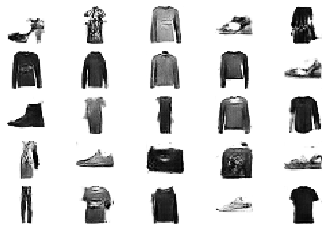

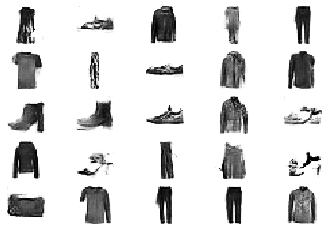

EPOCH: 19
20 0.66755736 0.67678034 0.72798735
20 0.7185606 0.6560143 0.74364626
20 0.6426307 0.69670826 0.7466717
20 0.660069 0.6832379 0.75204116
20 0.66183937 0.6536943 0.7587325
20 0.68507713 0.6822712 0.7709348
20 0.66835856 0.66520065 0.7916917
20 0.64650226 0.6480271 0.80645126
20 0.713539 0.66894805 0.76893103
20 0.664449 0.67545366 0.7466084
20 0.69731903 0.64830816 0.7612996
20 0.6705067 0.69711614 0.7685839
20 0.71141493 0.66761184 0.73452413
20 0.7002349 0.6882974 0.7505009
20 0.6655576 0.67855304 0.7515317
20 0.6830683 0.6639272 0.7392906
20 0.66481686 0.66164196 0.71714795
20 0.69886184 0.7584095 0.7529706
20 0.67287016 0.70758414 0.7752225
20 0.68265986 0.67761886 0.7443178
20 0.6679205 0.6714034 0.7598634
20 0.6762991 0.69154435 0.763686
20 0.672302 0.6376513 0.7460643
20 0.68230283 0.67635965 0.76522696
20 0.7137593 0.64900136 0.74250865
20 0.692534 0.6839938 0.77159464
20 0.7132782 0.6439202 0.7612776
20 0.71992916 0.68421924 0.73645246
20 0.66980535 0.68590397 0.74249

20 0.6779745 0.66299176 0.7561799
20 0.68190575 0.66873115 0.7276883
20 0.68512464 0.6803155 0.75261796
20 0.66472065 0.6864741 0.7458293
20 0.7126186 0.69766486 0.7517022
20 0.6589743 0.7162913 0.74
20 0.7115942 0.71112037 0.7364489
20 0.6870935 0.6652292 0.7576084
20 0.6908009 0.666348 0.7493751
20 0.6777479 0.6700282 0.759219
20 0.67289656 0.66147614 0.7616546
20 0.6713387 0.671761 0.76140076
20 0.69351804 0.67858815 0.72726834
20 0.66863596 0.67271936 0.7523977
20 0.65996855 0.6679987 0.7621386
20 0.67669296 0.66299725 0.74711764
20 0.698401 0.6994618 0.7765244
20 0.694727 0.6799898 0.76044863
20 0.6682541 0.6688036 0.755258
20 0.69080037 0.635319 0.7600623
20 0.6912949 0.7047304 0.7742952
20 0.6924889 0.686512 0.7714155
20 0.6819219 0.6850693 0.7565987
20 0.7025005 0.68527865 0.74760956
20 0.7139298 0.6783108 0.7414919
20 0.68737906 0.6682952 0.7586305
20 0.6712374 0.67387414 0.7590134
20 0.6939177 0.6889256 0.7481224
20 0.6891059 0.67974246 0.7627843
20 0.68052065 0.7004323 0.752

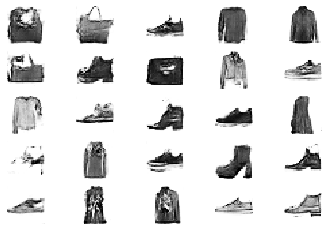

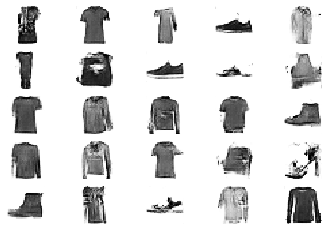

EPOCH: 20
21 0.6674298 0.6826267 0.74922395
21 0.6722276 0.67446744 0.7420655
21 0.69150835 0.690017 0.75100386
21 0.6577852 0.7060795 0.738266
21 0.69166285 0.7002821 0.7411641
21 0.66018254 0.6800438 0.76777804
21 0.6917521 0.678059 0.75501215
21 0.682167 0.67113805 0.74578
21 0.6815994 0.6716107 0.7408649
21 0.6832806 0.679737 0.75606763
21 0.69886315 0.66884065 0.7806517
21 0.6905451 0.6773225 0.74655664
21 0.68435365 0.66779053 0.7528522
21 0.6961969 0.67905474 0.76269054
21 0.6595149 0.7017678 0.76046205
21 0.68501306 0.66746473 0.75793016
21 0.6936229 0.688308 0.7323146
21 0.6851407 0.67337793 0.7500841
21 0.684467 0.6897414 0.7349464
21 0.67424786 0.67180026 0.74087954
21 0.6870347 0.6621187 0.7486843
21 0.7138014 0.68699515 0.75405324
21 0.66185987 0.6814869 0.7114328
21 0.694396 0.6769048 0.75095516
21 0.68914676 0.68891525 0.7700189
21 0.69531655 0.685417 0.75864506
21 0.7073359 0.6811185 0.7690935
21 0.6834062 0.67731565 0.7396239
21 0.68965155 0.6868819 0.7365949
21 0.6518

21 0.69552433 0.6770682 0.7422167
21 0.688962 0.68384814 0.7765755
21 0.68686223 0.6682869 0.7488447
21 0.6816953 0.68608 0.7712085
21 0.68326706 0.6812341 0.7334531
21 0.7198351 0.66147023 0.7547607
21 0.6578023 0.6935183 0.75523865
21 0.7025124 0.7020751 0.7463018
21 0.6512189 0.6844679 0.7589978
21 0.67454726 0.6771889 0.75665796
21 0.7107913 0.6616729 0.75137126
21 0.7036681 0.6753794 0.7387482
21 0.6706049 0.66867816 0.7770752
21 0.67900246 0.66682714 0.768662
21 0.71753675 0.68232214 0.7541089
21 0.69636494 0.6618967 0.75604403
21 0.7076469 0.685919 0.7386496
21 0.6692193 0.6729789 0.76388866
21 0.69410187 0.6766379 0.7507397
21 0.69628286 0.6520766 0.7718449
21 0.6809517 0.67673945 0.7402426
21 0.7009483 0.6866432 0.7510859
21 0.6582153 0.686365 0.7526691
21 0.7001296 0.67149353 0.7420926
21 0.6845857 0.7035053 0.744516
21 0.65954345 0.7083677 0.7470459
21 0.66016865 0.68802524 0.7645645
21 0.6755131 0.6765591 0.7757861
21 0.72553444 0.65652156 0.774136
21 0.67196417 0.6827407 0

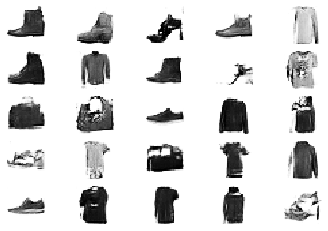

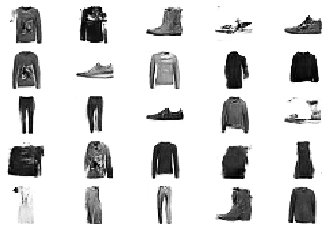

EPOCH: 21
22 0.68890643 0.6623218 0.7448604
22 0.67158055 0.673943 0.7441272
22 0.67139757 0.6869557 0.74202836
22 0.70322526 0.6452006 0.73788697
22 0.6753665 0.6892892 0.74365705
22 0.68715715 0.68201023 0.74221283
22 0.65480244 0.6881019 0.747037
22 0.68023473 0.6722591 0.74004114
22 0.6564114 0.6718659 0.74299765
22 0.69852304 0.6932213 0.7332287
22 0.68984544 0.7085743 0.74794143
22 0.6946355 0.6704133 0.7355497
22 0.67210245 0.69434565 0.7335018
22 0.6599055 0.7089083 0.72868705
22 0.6766391 0.6866254 0.7502282
22 0.6376282 0.6598983 0.76347923
22 0.6743056 0.69520557 0.74151343
22 0.6906409 0.6976733 0.7426377
22 0.6551738 0.68016964 0.7175454
22 0.6813912 0.6688813 0.79299676
22 0.68305916 0.6904509 0.76398134
22 0.6862104 0.67226523 0.7587362
22 0.6674997 0.6767889 0.7397672
22 0.6887522 0.69479215 0.7560155
22 0.7027008 0.65772927 0.7498882
22 0.7039078 0.673759 0.7577091
22 0.66505754 0.6884302 0.7410781
22 0.69674706 0.69465923 0.73789275
22 0.6934597 0.6847964 0.76475513
2

22 0.6837206 0.6931197 0.73528785
22 0.67902535 0.695368 0.7582222
22 0.64855146 0.66335636 0.77282184
22 0.712817 0.6711824 0.7932714
22 0.6846582 0.6698437 0.7320352
22 0.6646785 0.7324436 0.74707055
22 0.65491223 0.68803287 0.74967086
22 0.71020544 0.67892987 0.8004324
22 0.68100756 0.6493701 0.8005464
22 0.68063605 0.68170255 0.75916916
22 0.6842483 0.66627854 0.77486205
22 0.6689146 0.67705977 0.75853074
22 0.6901481 0.6691314 0.7729011
22 0.6888123 0.649595 0.75807744
22 0.65771616 0.6872487 0.75256884
22 0.69157016 0.68892276 0.75325274
22 0.6984829 0.67166376 0.78180695
22 0.6880776 0.6564557 0.77333224
22 0.71675867 0.66751164 0.7679862
22 0.68498707 0.69177365 0.76004374
22 0.6952431 0.68456006 0.79199624
22 0.697621 0.6812212 0.782139
22 0.6922626 0.6594497 0.765087
22 0.65488243 0.655469 0.7413142
22 0.708647 0.704291 0.7330066
22 0.68578553 0.7192838 0.7433574
22 0.64735293 0.7162036 0.73459756
22 0.6874371 0.65926695 0.7409123
22 0.7117717 0.6922797 0.74141216
22 0.687218

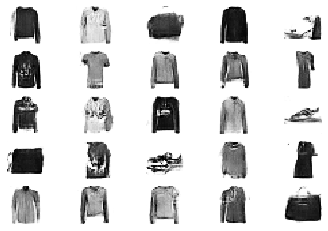

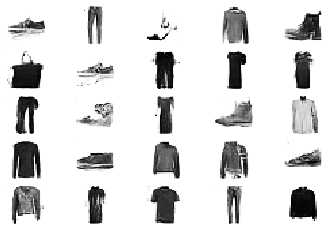

EPOCH: 22
23 0.6691159 0.6984587 0.74161565
23 0.6574854 0.7056615 0.7314379
23 0.668321 0.6799655 0.7736467
23 0.69115007 0.6796193 0.7570822
23 0.6725583 0.65388155 0.7735605
23 0.6894361 0.6601119 0.770338
23 0.67767334 0.64893496 0.78895974
23 0.6738436 0.68230325 0.7634851
23 0.7094555 0.68843156 0.76678175
23 0.68611825 0.69813585 0.74487543
23 0.6856026 0.66439474 0.73882675
23 0.69653606 0.6740115 0.7610086
23 0.68006086 0.66272944 0.7354484
23 0.6796393 0.6569296 0.7442683
23 0.68765664 0.6862954 0.76408076
23 0.6467297 0.7216251 0.7229197
23 0.6810621 0.66568685 0.7618847
23 0.66034555 0.65787864 0.7570051
23 0.6850721 0.6506906 0.7474855
23 0.67107284 0.6830911 0.7549696
23 0.6903749 0.6480254 0.7539024
23 0.68393105 0.685123 0.7566589
23 0.6566236 0.69156504 0.7671377
23 0.6761646 0.6640953 0.77951276
23 0.6765085 0.67318916 0.7606125
23 0.675112 0.69334304 0.76293254
23 0.6838113 0.66044927 0.7578885
23 0.68330497 0.7131903 0.7551501
23 0.6768595 0.66459465 0.7863422
23 0.

23 0.68907726 0.6782222 0.7595473
23 0.68396777 0.6639293 0.75070083
23 0.69361365 0.69071054 0.7691216
23 0.6970711 0.6902517 0.76503646
23 0.7102887 0.65373486 0.7668507
23 0.69150865 0.65387297 0.748881
23 0.71451586 0.67899203 0.765062
23 0.68154997 0.68100494 0.7500782
23 0.69661796 0.6724639 0.7555644
23 0.685935 0.67590153 0.7568178
23 0.69907707 0.6913738 0.7370863
23 0.6593435 0.67445505 0.73559093
23 0.6693921 0.6767571 0.76342475
23 0.703215 0.6834474 0.74223113
23 0.67792237 0.67288196 0.7385902
23 0.6776893 0.66309905 0.7738881
23 0.6671026 0.67970145 0.7467005
23 0.6965314 0.6664878 0.7747318
23 0.67474395 0.67203486 0.7415934
23 0.6997303 0.68658984 0.7535203
23 0.69675916 0.6446397 0.79256916
23 0.6899177 0.6480707 0.76995933
23 0.6769064 0.6786156 0.72498286
23 0.6813624 0.7092251 0.7629275
23 0.6506996 0.68047285 0.7837199
23 0.65692574 0.6737555 0.7870844
23 0.65271723 0.6666974 0.778471
23 0.67702866 0.6790824 0.758924
23 0.7153824 0.66866237 0.7495848
23 0.6845595 

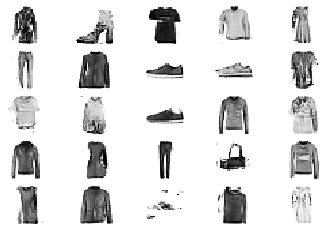

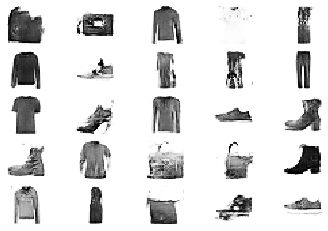

EPOCH: 23
24 0.67905444 0.6840954 0.7747261
24 0.67394197 0.6778556 0.76337206
24 0.6728714 0.69272757 0.7431686
24 0.6489862 0.704809 0.7462727
24 0.6616242 0.66675764 0.7550608
24 0.6671885 0.665621 0.7625361
24 0.64527965 0.6627712 0.7625664
24 0.7080168 0.676103 0.7962413
24 0.70706177 0.63865954 0.7498148
24 0.6885067 0.690701 0.75942117
24 0.64912444 0.65079474 0.7518332
24 0.6785102 0.68617916 0.76426625
24 0.6942375 0.6826215 0.7661248
24 0.68299055 0.6710344 0.74834466
24 0.690975 0.7169012 0.7990941
24 0.68904006 0.6843795 0.77251524
24 0.6450808 0.6764022 0.76511556
24 0.6910299 0.69507647 0.7338965
24 0.65778995 0.70197916 0.7654791
24 0.652138 0.62423396 0.82284665
24 0.71315396 0.6124575 0.7912624
24 0.68333626 0.7182311 0.73408043
24 0.6542136 0.6808002 0.7300342
24 0.6545032 0.69674444 0.7443998
24 0.67590415 0.6756926 0.7773538
24 0.6604955 0.67363787 0.75663424
24 0.7024739 0.6538495 0.737931
24 0.67726344 0.6906063 0.7441691
24 0.6610359 0.6926507 0.7411282
24 0.6687

24 0.65527815 0.68885803 0.7512089
24 0.6841808 0.66309875 0.77930856
24 0.70500153 0.64232725 0.77312887
24 0.68319523 0.712483 0.7348759
24 0.6939359 0.6832777 0.755203
24 0.6717257 0.6752302 0.7707716
24 0.6723653 0.6456205 0.7728373
24 0.6794969 0.72597045 0.75977653
24 0.7070662 0.7258671 0.7281424
24 0.6517466 0.6898196 0.7879007
24 0.69576776 0.65151924 0.7572886
24 0.67145526 0.6841092 0.782932
24 0.6962875 0.7155611 0.7406393
24 0.66286916 0.685804 0.73073477
24 0.6938285 0.6788522 0.78276485
24 0.6737767 0.65434074 0.78425366
24 0.68120414 0.6969277 0.7775918
24 0.675577 0.72147596 0.76765543
24 0.66300505 0.680905 0.776037
24 0.71884537 0.646109 0.7582437
24 0.6864883 0.6773979 0.7632368
24 0.66733974 0.66497904 0.7420004
24 0.74756366 0.68505836 0.73823017
24 0.6920916 0.6720845 0.7541206
24 0.70255315 0.67388654 0.76306707
24 0.65560865 0.6707039 0.7557426
24 0.70429736 0.68732846 0.7623457
24 0.69030434 0.6639332 0.73467433
24 0.7023629 0.6795459 0.76162267
24 0.6834032 0

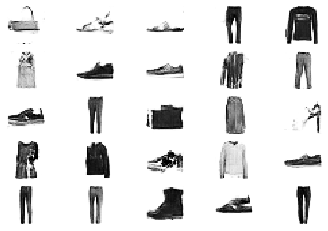

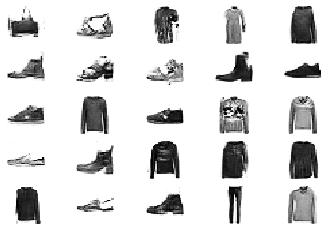

EPOCH: 24
25 0.68706393 0.66333383 0.7678875
25 0.6839112 0.6505701 0.7535161
25 0.6752248 0.6779383 0.749934
25 0.67877847 0.69151014 0.74993676
25 0.71055305 0.69197494 0.75173295
25 0.6507756 0.6727052 0.76963425
25 0.66534716 0.6647001 0.7465384
25 0.70774007 0.65409875 0.77425605
25 0.7230867 0.66762054 0.75761294
25 0.67919844 0.6767131 0.7669955
25 0.68970394 0.6660311 0.73702693
25 0.66177416 0.6747551 0.7696169
25 0.7310909 0.675007 0.77082497
25 0.6869432 0.6745772 0.7626112
25 0.68918586 0.6660667 0.754778
25 0.66943604 0.6824428 0.72174287
25 0.6761306 0.69487053 0.75143147
25 0.6882149 0.6852156 0.7638515
25 0.6913302 0.70002544 0.74126184
25 0.70096827 0.6509615 0.76689553
25 0.6903379 0.67868805 0.73634124
25 0.67944604 0.66414726 0.7473226
25 0.7134393 0.68861574 0.7500583
25 0.68028617 0.6786721 0.7479853
25 0.689857 0.6688148 0.7628633
25 0.7088679 0.6937138 0.7440255
25 0.674768 0.67563766 0.7560301
25 0.680024 0.6932926 0.7549052
25 0.6913051 0.6815474 0.7665876
25 

25 0.6701238 0.67136014 0.73109716
25 0.70213866 0.7035184 0.7551695
25 0.6470924 0.6586449 0.7719101
25 0.6428833 0.6605433 0.77817607
25 0.72747093 0.6797876 0.75770414
25 0.6958174 0.66587305 0.7626216
25 0.688113 0.6707769 0.76597166
25 0.6833409 0.67115086 0.76738876
25 0.6732595 0.6846466 0.75240314
25 0.7054435 0.6705161 0.74818397
25 0.6622359 0.68481255 0.72830486
25 0.6878154 0.7074431 0.74866563
25 0.6924155 0.6903846 0.7541448
25 0.6950531 0.69027317 0.74351895
25 0.66580486 0.6765763 0.7638801
25 0.6900406 0.6480883 0.7796979
25 0.68634653 0.65960914 0.7428149
25 0.6977158 0.6860532 0.7428282
25 0.7055741 0.69317365 0.7350751
25 0.69752496 0.68939936 0.7741691
25 0.6755992 0.668099 0.7510458
25 0.6663924 0.70053124 0.7572355
25 0.67272544 0.652805 0.76400554
25 0.6712541 0.70781684 0.78264964
25 0.6905839 0.6735184 0.74714464
25 0.6635186 0.67002475 0.74765635
25 0.67363596 0.68709147 0.7712066
25 0.6966905 0.6714076 0.77058804
25 0.7149161 0.654145 0.75537753
25 0.6630972

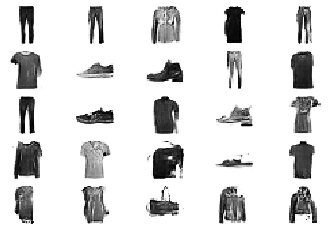

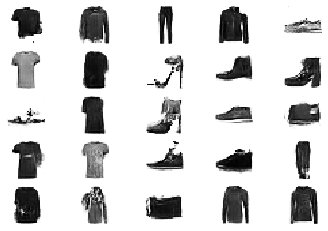

EPOCH: 25
26 0.6904467 0.7033177 0.74046826
26 0.65880466 0.7002723 0.74881595
26 0.6624913 0.67200404 0.7330008
26 0.6636281 0.6977734 0.73710215
26 0.67819226 0.69526637 0.7491067
26 0.7087066 0.68581146 0.7427925
26 0.68644476 0.7241309 0.7439044
26 0.6850721 0.65470064 0.7509412
26 0.710072 0.6917014 0.7639873
26 0.68441427 0.68503535 0.7575501
26 0.66378164 0.6591394 0.73919034
26 0.6877806 0.68083644 0.75663614
26 0.68091774 0.69919616 0.7439728
26 0.7115979 0.69247746 0.74632764
26 0.69175076 0.70177805 0.7594696
26 0.7065296 0.67389405 0.7345643
26 0.6752244 0.6932269 0.7365191
26 0.6570553 0.67295665 0.7360742
26 0.6729096 0.69088125 0.7557309
26 0.6788393 0.665408 0.7564715
26 0.70290804 0.6793709 0.76712334
26 0.6928806 0.71049106 0.7543566
26 0.6926546 0.6623481 0.7557299
26 0.6754488 0.6698409 0.7592617
26 0.67023885 0.699247 0.7528584
26 0.67161465 0.69982123 0.75559175
26 0.6660757 0.704455 0.7566537
26 0.6994145 0.6716028 0.7841179
26 0.6711693 0.6627108 0.7636053
26 0.

26 0.7002899 0.6921258 0.7409936
26 0.67849386 0.6575233 0.7567964
26 0.68953276 0.6789087 0.74270225
26 0.6759342 0.6945456 0.72915024
26 0.66630244 0.67425835 0.7387124
26 0.69104147 0.70391005 0.7526095
26 0.65876216 0.71304214 0.7684184
26 0.7065133 0.6873741 0.7461778
26 0.7039766 0.67544955 0.765361
26 0.7024902 0.6717795 0.7490193
26 0.6751756 0.6787011 0.77715665
26 0.6702487 0.6721455 0.7550235
26 0.69839895 0.6829529 0.7544326
26 0.69587183 0.66696125 0.75073475
26 0.6926169 0.67442936 0.7638353
26 0.70777106 0.667663 0.75402105
26 0.66422415 0.6818343 0.76591605
26 0.7038465 0.68356574 0.7672609
26 0.66522026 0.6646547 0.76299816
26 0.7049201 0.6692667 0.7468425
26 0.70404625 0.6760156 0.7376368
26 0.68423367 0.70743096 0.75509024
26 0.69014573 0.688993 0.73407173
26 0.6651144 0.67374516 0.7546305
26 0.68048215 0.67910814 0.73140967
26 0.6737301 0.6464441 0.72602046
26 0.67822415 0.7045407 0.72635436
26 0.6709958 0.709857 0.73304075
26 0.698152 0.6896404 0.72999465
26 0.6756

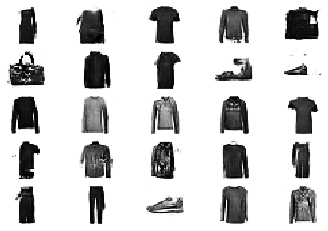

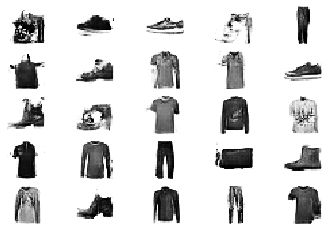

EPOCH: 26
27 0.69839096 0.6207136 0.83272773
27 0.66697913 0.7061668 0.73507154
27 0.7245095 0.7105194 0.76219845
27 0.6661053 0.6665368 0.80540574
27 0.66375166 0.66574824 0.8069116
27 0.64830077 0.7003957 0.74182326
27 0.70362884 0.6864243 0.7395899
27 0.6649543 0.65663767 0.7758988
27 0.656963 0.67918587 0.77697986
27 0.6671249 0.6728833 0.7811829
27 0.65960765 0.72066164 0.77918714
27 0.68105215 0.7113608 0.7537191
27 0.6872496 0.6684276 0.7441938
27 0.6632751 0.6377861 0.7581072
27 0.6855186 0.68381464 0.7376248
27 0.66072375 0.70225656 0.7366292
27 0.6783749 0.7005918 0.72784215
27 0.67208844 0.7146821 0.7530315
27 0.69370806 0.6710864 0.7519715
27 0.67934453 0.67626375 0.7501646
27 0.7005688 0.6770967 0.7756285
27 0.670658 0.6699954 0.7800407
27 0.6785592 0.666988 0.75139034
27 0.6900027 0.69242775 0.74066937
27 0.6586096 0.68355817 0.7478825
27 0.6641139 0.64223576 0.7829782
27 0.6483203 0.70098746 0.7449232
27 0.6817574 0.6758627 0.7675581
27 0.6985846 0.67042494 0.7711413
27 

27 0.7022519 0.67584074 0.74743277
27 0.6815258 0.66785717 0.76133895
27 0.69201446 0.65820897 0.73825896
27 0.6898377 0.66996634 0.75425756
27 0.65052783 0.65091395 0.7548259
27 0.6763004 0.67461467 0.746151
27 0.6451603 0.69411075 0.7452474
27 0.7089126 0.6681486 0.75516796
27 0.7006004 0.7199904 0.7519872
27 0.6845598 0.67740417 0.7404944
27 0.6895565 0.71090055 0.7466753
27 0.6775285 0.7109737 0.740826
27 0.6702708 0.7114936 0.76181626
27 0.6980759 0.6742599 0.7735493
27 0.6905322 0.65650743 0.76715827
27 0.6877706 0.70536923 0.73881096
27 0.6936102 0.67954504 0.7297073
27 0.68772745 0.6940324 0.7638478
27 0.67817175 0.6723437 0.7596568
27 0.6777555 0.69779617 0.7365277
27 0.6519075 0.6964112 0.7467867
27 0.66428137 0.6451396 0.7723247
27 0.6661782 0.6926439 0.7590189
27 0.7114865 0.70773596 0.75388336
27 0.68107325 0.67707145 0.73245823
27 0.6730491 0.67559046 0.7485268
27 0.65366673 0.69321024 0.7315532
27 0.6832689 0.6501901 0.75108314
27 0.66833186 0.65218765 0.74332845
27 0.69

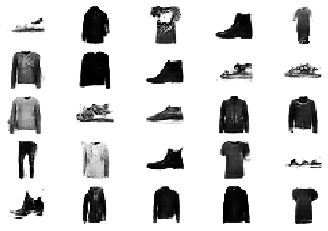

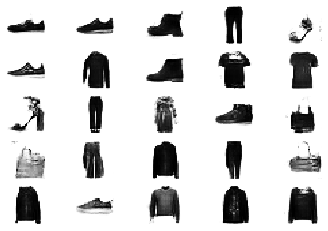

EPOCH: 27
28 0.67964876 0.6303736 0.8352479
28 0.6515376 0.63656175 0.8312789
28 0.6944483 0.6948121 0.73474145
28 0.7015039 0.71227837 0.7258909
28 0.68183124 0.70348173 0.79372716
28 0.67871743 0.6709339 0.811959
28 0.65125185 0.6758599 0.82142097
28 0.66104907 0.71123195 0.73107225
28 0.6897122 0.6788638 0.7396834
28 0.6785892 0.69605625 0.76010156
28 0.66870236 0.66070807 0.8014854
28 0.6667501 0.61053866 0.820436
28 0.69296837 0.64920896 0.7659743
28 0.71329343 0.7364402 0.7168225
28 0.6639299 0.7275077 0.73352295
28 0.67247546 0.69600964 0.7761643
28 0.6827691 0.6416348 0.83492315
28 0.6761568 0.67972964 0.7810783
28 0.6890935 0.68519807 0.73475695
28 0.6355151 0.72911215 0.73083895
28 0.658355 0.7119619 0.75857246
28 0.6827495 0.64032704 0.8081628
28 0.6829475 0.6264996 0.82691526
28 0.69071543 0.69280076 0.77387464
28 0.7241662 0.704662 0.7390308
28 0.6715955 0.6729568 0.7733445
28 0.6615087 0.6436807 0.80648625
28 0.6486218 0.7004861 0.7709736
28 0.70690787 0.69419956 0.744996

28 0.671997 0.7077347 0.73268723
28 0.7168506 0.65919113 0.7452585
28 0.6626658 0.6788285 0.7366556
28 0.65349704 0.69572055 0.73874724
28 0.7038158 0.68869686 0.7530196
28 0.67990965 0.6590841 0.7425816
28 0.6999713 0.6709577 0.76878154
28 0.7245716 0.71296895 0.76225585
28 0.6703381 0.6831198 0.7734051
28 0.6974652 0.6792203 0.78119564
28 0.683264 0.6897949 0.74806273
28 0.68121046 0.66936564 0.7516386
28 0.69520444 0.65022206 0.7601322
28 0.6516421 0.68527675 0.7573668
28 0.68509746 0.6738774 0.7326124
28 0.71030927 0.6871594 0.7491431
28 0.6984596 0.6952416 0.7466178
28 0.69611645 0.67190766 0.74053574
28 0.6947354 0.6783012 0.7395147
28 0.66729987 0.6721157 0.7712782
28 0.6950735 0.67759836 0.74980086
28 0.7076541 0.6791275 0.75798607
28 0.66427916 0.63721734 0.7767105
28 0.6594178 0.67113596 0.7462874
28 0.71891105 0.66840637 0.7309438
28 0.66550803 0.6989629 0.7602963
28 0.6920456 0.6589656 0.7700269
28 0.67310065 0.65981925 0.7497433
28 0.68966156 0.67658055 0.7532671
28 0.6892

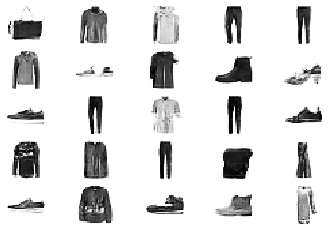

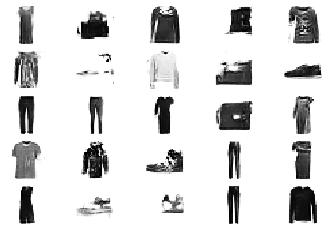

EPOCH: 28
29 0.665264 0.6805697 0.73938334
29 0.65829724 0.7061017 0.74437445
29 0.6741636 0.6676424 0.7491846
29 0.7033019 0.6820846 0.74138653
29 0.69710016 0.68163145 0.75967646
29 0.6561299 0.6794353 0.7781725
29 0.68801266 0.6704849 0.7625068
29 0.68746835 0.6530743 0.75766444
29 0.6701315 0.6911881 0.74718255
29 0.69108665 0.6882098 0.74510306
29 0.67232096 0.6712951 0.74650395
29 0.67355156 0.672485 0.75833607
29 0.7183603 0.6409541 0.74647725
29 0.7065477 0.67037874 0.7410343
29 0.6935097 0.6994284 0.7492555
29 0.6968783 0.6641147 0.75352544
29 0.6836188 0.6607886 0.7424083
29 0.68580276 0.67481303 0.75834346
29 0.65765834 0.6873561 0.7609874
29 0.68591154 0.66450447 0.7604971
29 0.7004361 0.6990629 0.7496469
29 0.68412983 0.7105784 0.72292584
29 0.69595027 0.67024416 0.7656487
29 0.65484923 0.71312565 0.75420415
29 0.6582191 0.67549133 0.7477801
29 0.71814954 0.66908383 0.7202097
29 0.68104434 0.6648653 0.7310952
29 0.70276856 0.70934176 0.73175836
29 0.6714612 0.68692136 0.74

29 0.6619891 0.66835624 0.7436359
29 0.6615516 0.6838052 0.7565171
29 0.6621511 0.67488796 0.750708
29 0.7036455 0.6733512 0.74302197
29 0.70226574 0.68079615 0.74896467
29 0.7001071 0.7022209 0.7543187
29 0.6812415 0.69330275 0.7383975
29 0.6949879 0.6762457 0.747765
29 0.6798862 0.658345 0.73290336
29 0.68537605 0.67637765 0.7654871
29 0.6801568 0.7055266 0.750698
29 0.69999945 0.6826904 0.7400676
29 0.6445606 0.6564443 0.768322
29 0.67227083 0.65852654 0.7492949
29 0.6553564 0.7183809 0.7421537
29 0.69928473 0.6809504 0.7510769
29 0.6980698 0.65854913 0.744875
29 0.6823956 0.67492765 0.73678803
29 0.6800542 0.7072922 0.7497978
29 0.66526103 0.66985613 0.73164135
29 0.6618254 0.70543027 0.73461485
29 0.70384586 0.6650648 0.747121
29 0.67876387 0.66222984 0.7708937
29 0.7056565 0.6915941 0.74831605
29 0.68866193 0.6710145 0.76277477
29 0.7108537 0.70496917 0.7752129
29 0.7031528 0.6549239 0.75083774
29 0.6960217 0.6447629 0.768888
29 0.71407604 0.68307054 0.76288116
29 0.648729 0.7137

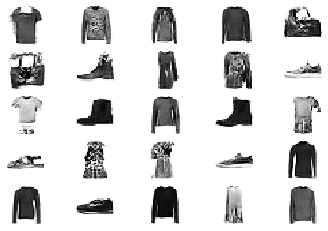

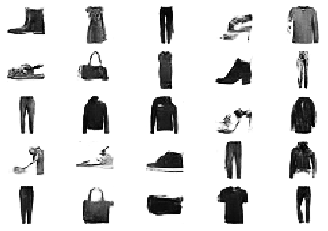

EPOCH: 29


In [5]:
# train model
train(g_model, d_model, gan_model, dataset, latent_dim, callback, 30)

In [2]:
from tensorflow.keras.models import load_model
from src.models.train_helpers import generate_image_show
# load model
model = load_model('../models/cgan_generator_mnist.h5', compile=False)

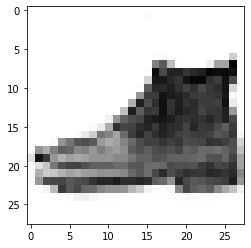

In [11]:
generate_image_show(model,100,9);

In [1]:
%load_ext tensorboard
%tensorboard --logdir logs --bind_all